# <center><strong>Riesgo de obesidad</strong></center>

#### **Marcelo Vidal**


-----------------------------

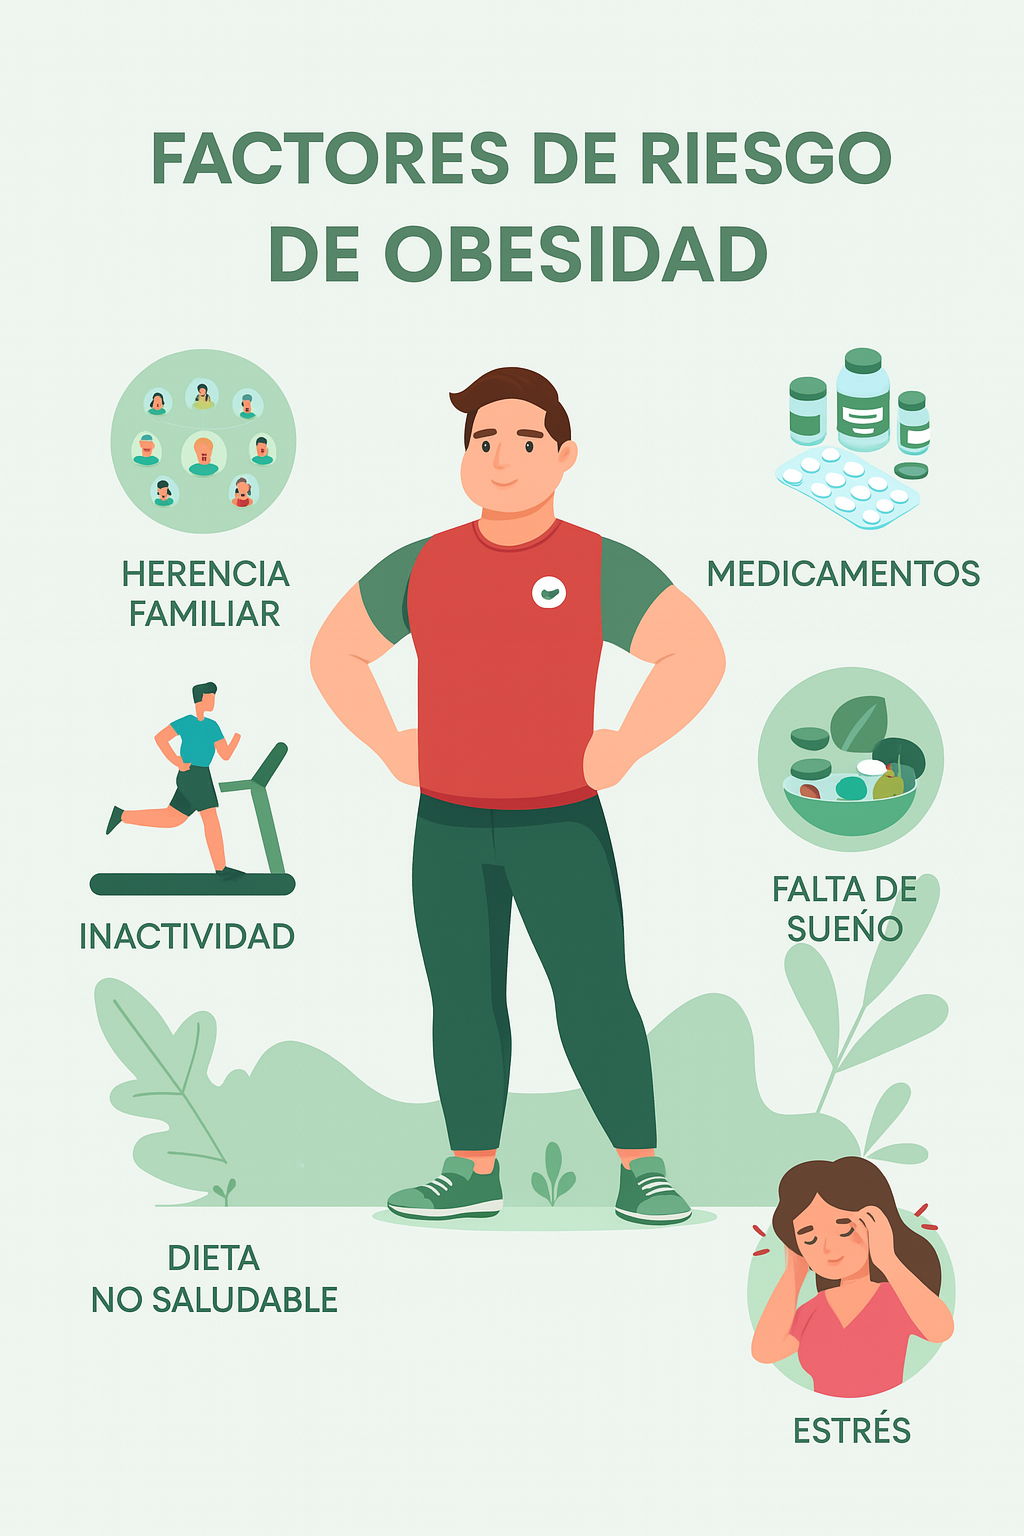

In [22]:
from IPython.display import Image
Image(filename='imagen.png')

----------------------------

## <center><strong>Resumen del proyecto</strong></center>

### **Este conjunto de datos de Kaggle proporciona información completa sobre las personas, incluyendo atributos clave como sexo, edad, altura, peso, antecedentes familiares de sobrepeso, hábitos alimenticios, actividad física, medio de transporte y el nivel de obesidad correspondiente. El conjunto de datos está cuidadosamente seleccionado para la investigación y el análisis en el ámbito de los estudios de salud y estilo de vida.**

--------------------------------------
--------------------------------------
--------------------------------------

## **Librerias Importadas**

-------------------------

In [23]:
from pandas import read_csv, concat
from matplotlib.pyplot import show, tight_layout, subplots
from matplotlib.pyplot import figure, title, xlabel, ylabel, grid, tight_layout
from seaborn import kdeplot, heatmap, boxplot, regplot, countplot, histplot

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import classification_report

from pickle import dump

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

--------------------------------
--------------------------------
-------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

# **Analisis exploratorio**
## **Exploratory Data Analysis (EDA)**

## **Comprensión inicial de los datos**
- **Carga e inspección de datos**
- **Tipos de datos**
- **Valores faltantes**
- **Duplicados**

------------------------

In [24]:
#Cargamos el csv
train_df= read_csv('train_obesity.csv')
train_df

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

In [25]:
train_df.head(5)

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [26]:
train_df.sample(5)

id  Gender        Age    Height      Weight  \
12297  12297    Male  36.769646  1.779049  100.624553   
12417  12417  Female  25.930376  1.629442  104.988925   
13746  13746    Male  18.000000  1.763029  112.010504   
2065    2065    Male  18.904037  1.696423   78.434492   
13914  13914  Female  26.000000  1.656465  111.939983   

      family_history_with_overweight FAVC      FCVC       NCP       CAEC  \
12297                            yes  yes  2.341999  1.135278  Sometimes   
12417                            yes  yes  3.000000  3.000000  Sometimes   
13746                            yes  yes  3.000000  3.000000  Sometimes   
2065                             yes  yes  2.000000  2.499108  Sometimes   
13914                            yes  yes  3.000000  3.000000  Sometimes   

      SMOKE      CH2O SCC       FAF       TUE        CALC  \
12297    no  2.691322  no  2.001230  0.000000  Frequently   
12417    no  2.709140  no  0.015860  0.803141   Sometimes   
13746    no  1.131185  no  0.690269  0.000000   Sometimes   
2065     no  2.774043  no  0.463949  0.000000          no   
13914    no  2.501638  no  0.000000  0.152985   Sometimes   

                      MTRANS           NObeyesdad  
12297             Automobile       Obesity_Type_I  
12417  Public_Transportation     Obesity_Type_III  
13746  Public_Transportation       Obesity_Type_I  
2065   Public_Transportation  Overweight_Level_II  
13914  Public_Transportation     Obesity_Type_III

In [27]:
train_df.tail(5)

id Gender        Age    Height      Weight  \
20753  20753   Male  25.137087  1.766626  114.187096   
20754  20754   Male  18.000000  1.710000   50.000000   
20755  20755   Male  20.101026  1.819557  105.580491   
20756  20756   Male  33.852953  1.700000   83.520113   
20757  20757   Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II

In [28]:
train_df.shape

(20758, 18)

In [29]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [30]:
# Changing the names of some columns

train_df.rename(columns={'FAVC': 'Frequent consumption of high-caloric food',
                         'family_history_with_overweight':'Family history with overweight',
                         'FCVC': 'Frequency of vegetable consumption',
                         'NCP':'Number of main meals the person eats per day',
                         'CAEC':'Consumption of food between meals',
                         'CH2O':'Daily water consumption',
                         'SCC':'Whether the person takes calorie supplements',
                         'FAF':'Physical activity frequency',
                         'TUE':'Time spent using technology',
                         'CALC':'Alcohol consumption',
                         'MTRANS':'Means of transportation used',
                         'NObeyesdad':'Obesity level class' } ,inplace=True)

In [31]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'Family history with overweight',
       'Frequent consumption of high-caloric food',
       'Frequency of vegetable consumption',
       'Number of main meals the person eats per day',
       'Consumption of food between meals', 'SMOKE', 'Daily water consumption',
       'Whether the person takes calorie supplements',
       'Physical activity frequency', 'Time spent using technology',
       'Alcohol consumption', 'Means of transportation used',
       'Obesity level class'],
      dtype='object')

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20758 non-null  int64  
 1   Gender                                        20758 non-null  object 
 2   Age                                           20758 non-null  float64
 3   Height                                        20758 non-null  float64
 4   Weight                                        20758 non-null  float64
 5   Family history with overweight                20758 non-null  object 
 6   Frequent consumption of high-caloric food     20758 non-null  object 
 7   Frequency of vegetable consumption            20758 non-null  float64
 8   Number of main meals the person eats per day  20758 non-null  float64
 9   Consumption of food between meals             20758 non-null 

In [33]:
train_df.isnull().sum()

id                                              0
Gender                                          0
Age                                             0
Height                                          0
Weight                                          0
Family history with overweight                  0
Frequent consumption of high-caloric food       0
Frequency of vegetable consumption              0
Number of main meals the person eats per day    0
Consumption of food between meals               0
SMOKE                                           0
Daily water consumption                         0
Whether the person takes calorie supplements    0
Physical activity frequency                     0
Time spent using technology                     0
Alcohol consumption                             0
Means of transportation used                    0
Obesity level class                             0
dtype: int64

In [34]:
train_df.duplicated().sum()

np.int64(0)

In [35]:
train_df = train_df.drop('id',axis=1)

# Resumen estadístico : **describe()**

In [36]:
train_df.describe().T

count       mean        std  \
Age                                           20758.0  23.841804   5.688072   
Height                                        20758.0   1.700245   0.087312   
Weight                                        20758.0  87.887768  26.379443   
Frequency of vegetable consumption            20758.0   2.445908   0.533218   
Number of main meals the person eats per day  20758.0   2.761332   0.705375   
Daily water consumption                       20758.0   2.029418   0.608467   
Physical activity frequency                   20758.0   0.981747   0.838302   
Time spent using technology                   20758.0   0.616756   0.602113   

                                                min        25%        50%  \
Age                                           14.00  20.000000  22.815416   
Height                                         1.45   1.631856   1.700000   
Weight                                        39.00  66.000000  84.064875   
Frequency of vegetable consumption             1.00   2.000000   2.393837   
Number of main meals the person eats per day   1.00   3.000000   3.000000   
Daily water consumption                        1.00   1.792022   2.000000   
Physical activity frequency                    0.00   0.008013   1.000000   
Time spent using technology                    0.00   0.000000   0.573887   

                                                     75%         max  
Age                                            26.000000   61.000000  
Height                                          1.762887    1.975663  
Weight                                        111.600553  165.057269  
Frequency of vegetable consumption              3.000000    3.000000  
Number of main meals the person eats per day    3.000000    4.000000  
Daily water consumption                         2.549617    3.000000  
Physical activity frequency                     1.587406    3.000000  
Time spent using technology                     1.000000    2.000000

In [37]:
train_df.select_dtypes(include='object').describe()

Gender Family history with overweight  \
count    20758                          20758   
unique       2                              2   
top     Female                            yes   
freq     10422                          17014   

       Frequent consumption of high-caloric food  \
count                                      20758   
unique                                         2   
top                                          yes   
freq                                       18982   

       Consumption of food between meals  SMOKE  \
count                              20758  20758   
unique                                 4      2   
top                            Sometimes     no   
freq                               17529  20513   

       Whether the person takes calorie supplements Alcohol consumption  \
count                                         20758               20758   
unique                                            2                   3   
top                                              no           Sometimes   
freq                                          20071               15066   

       Means of transportation used Obesity level class  
count                         20758               20758  
unique                            5                   7  
top           Public_Transportation    Obesity_Type_III  
freq                          16687                4046

----------------------------

- Resumen estadístico : **value_counts()**

In [38]:
train_df['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

/tmp/ipython-input-39-2073924860.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=train_df, palette=['green','red'])


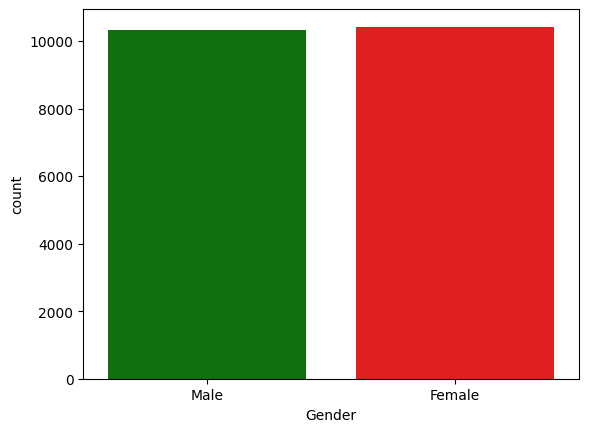

In [39]:
countplot(x='Gender', data=train_df, palette=['green','red'])
plt.xlabel('Gender')
plt.show()

--------------------------

In [40]:
train_df['Family history with overweight'].value_counts()

Family history with overweight
yes    17014
no      3744
Name: count, dtype: int64

---------------------

In [41]:
train_df['Frequent consumption of high-caloric food'].value_counts()

Frequent consumption of high-caloric food
yes    18982
no      1776
Name: count, dtype: int64

-----------------------

In [42]:
train_df['Consumption of food between meals'].value_counts()

Consumption of food between meals
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

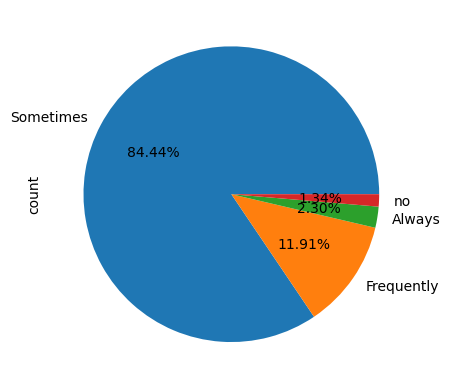

In [43]:
train_df['Consumption of food between meals'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **El porcentaje de Consumo de alimentos entre comidas (a veces) es muy alto (84,44 %) en comparación con el resto de porcentajes**

--------------------------

In [44]:
train_df['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

---------------------

In [45]:
train_df['Whether the person takes calorie supplements'].value_counts()

Whether the person takes calorie supplements
no     20071
yes      687
Name: count, dtype: int64

---------------------------

In [46]:
train_df['Alcohol consumption'].value_counts()

Alcohol consumption
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

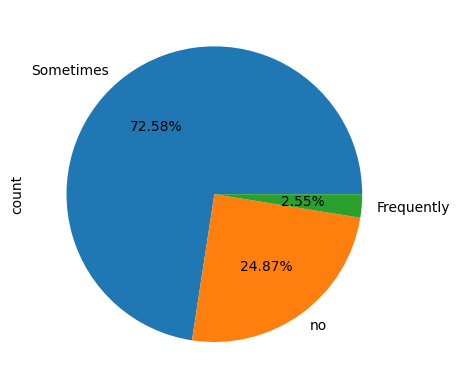

In [47]:
train_df['Alcohol consumption'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **El porcentaje de consumo de Alcohol (a veces) es muy alto (72,58 %) en comparación con los porcentajes del resto de los demás porcentajes**

-----------------------------

In [48]:
train_df['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

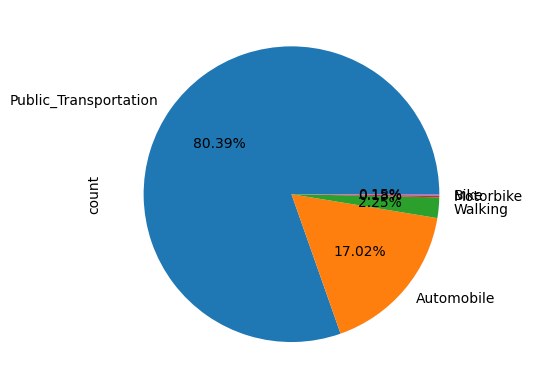

In [49]:
train_df['Means of transportation used'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **El porcentaje de utilización del transporte público es muy elevado (80,39 %) en comparación con los porcentajes del resto de porcentajes**

-------------------------

In [50]:
train_df['Obesity level class'].value_counts()

Obesity level class
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

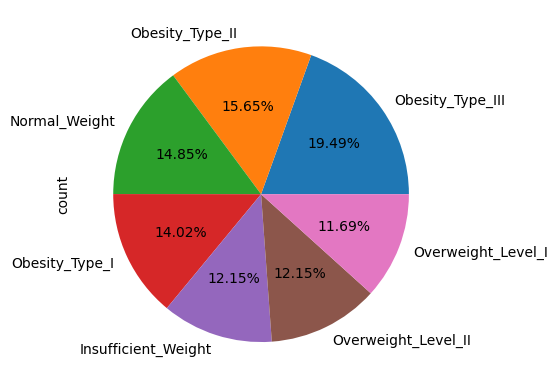

In [51]:
train_df['Obesity level class'].value_counts().plot.pie(autopct='%0.2f%%')
show()

--------------------------------
------------------------------

## **Distribution of Variables**

------------------------

**Características numéricas (KDE)**

----------------------

In [52]:
train_df.select_dtypes('number')

Age    Height      Weight  Frequency of vegetable consumption  \
0      24.443011  1.699998   81.669950                            2.000000   
1      18.000000  1.560000   57.000000                            2.000000   
2      18.000000  1.711460   50.165754                            1.880534   
3      20.952737  1.710730  131.274851                            3.000000   
4      31.641081  1.914186   93.798055                            2.679664   
...          ...       ...         ...                                 ...   
20753  25.137087  1.766626  114.187096                            2.919584   
20754  18.000000  1.710000   50.000000                            3.000000   
20755  20.101026  1.819557  105.580491                            2.407817   
20756  33.852953  1.700000   83.520113                            2.671238   
20757  26.680376  1.816547  118.134898                            3.000000   

       Number of main meals the person eats per day  Daily water consumption  \
0                                          2.983297                 2.763573   
1                                          3.000000                 2.000000   
2                                          1.411685                 1.910378   
3                                          3.000000                 1.674061   
4                                          1.971472                 1.979848   
...                                             ...                      ...   
20753                                      3.000000                 2.151809   
20754                                      4.000000                 1.000000   
20755                                      3.000000                 2.000000   
20756                                      1.971472                 2.144838   
20757                                      3.000000                 2.003563   

       Physical activity frequency  Time spent using technology  
0                         0.000000                     0.976473  
1                         1.000000                     1.000000  
2                         0.866045                     1.673584  
3                         1.467863                     0.780199  
4                         1.967973                     0.931721  
...                            ...                          ...  
20753                     1.330519                     0.196680  
20754                     2.000000                     1.000000  
20755                     1.158040                     1.198439  
20756                     0.000000                     0.973834  
20757                     0.684487                     0.713823  

[20758 rows x 8 columns]

In [53]:
# for	col	in train_df.select_dtypes('number').columns:
#     figure(figsize=(12,	4))
#     kdeplot(train_df[col], fill=True,	color='blue', alpha=0.6)
#     title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
#     xlabel(col,	fontsize=12)
#     ylabel('Density', fontsize=12)
#     grid(True, linestyle='--', alpha=0.7)
#     tight_layout()
#     show()

-----------------

#### **La distribución de la edad**

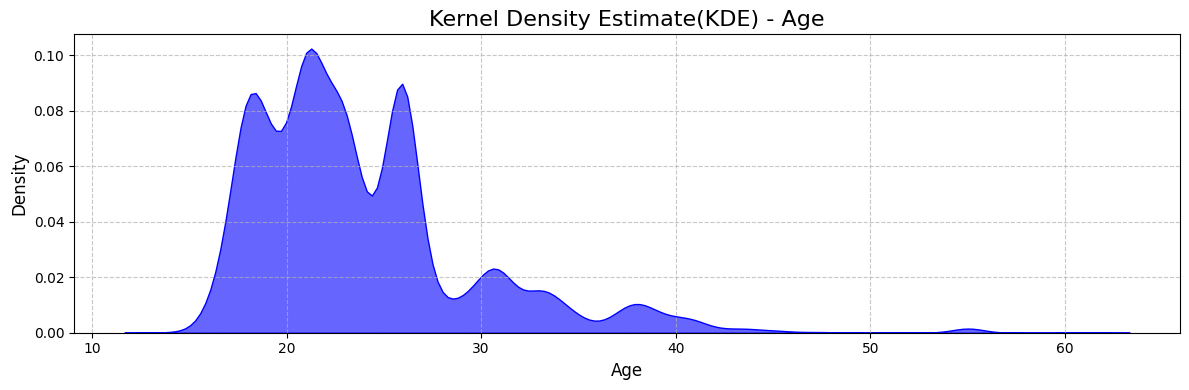

In [54]:
figure(figsize=(12,	4))
kdeplot(train_df['Age'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Age',	fontsize=16)
xlabel('Age',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()


- ##### **Distribución multimodal**: Parece haber varios picos distintivos en la distribución, lo que indica la presencia de múltiples grupos de edad con mayor densidad en los datos.
- ##### **Peak principal**: El peak más grande se encuentra alrededor de los 20-25 años, lo que sugiere que este grupo de edad es el más representado en el conjunto de datos.
- ##### **Peak secundarios**: Hay otros peaks menos prominentes alrededor de los 30 años y menos de 10 años, lo que indica la presencia de otros subgrupos con una densidad notable.
- ##### **Dispersión de los datos**: La distribución abarca un amplio rango, desde aproximadamente los 5 años hasta los 60 años, lo que demuestra una variabilidad significativa en las edades de los individuos en los datos.
- ##### **Declinación de la cola**: La cola derecha de la distribución declina gradualmente, lo que sugiere un menor número de individuos en los grupos de mayor edad.

------------------------

#### **The Distribution of Height**

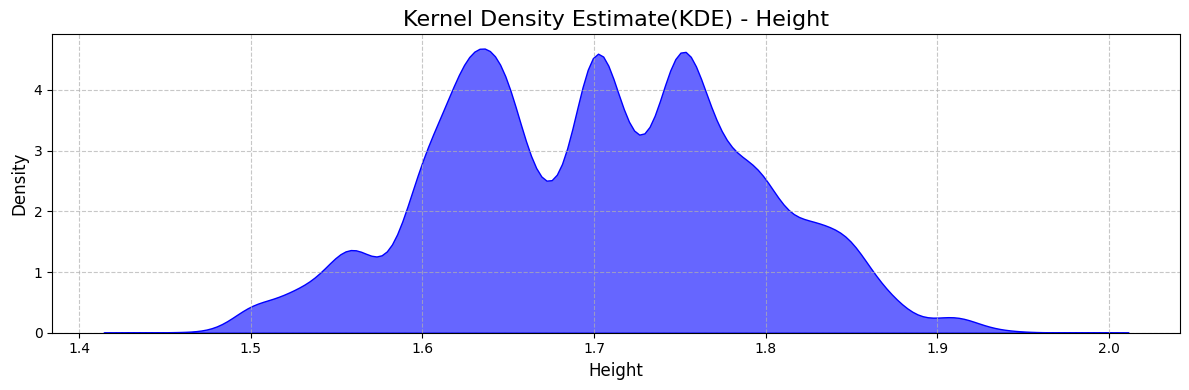

In [55]:
figure(figsize=(12,	4))
kdeplot(train_df['Height'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Height',	fontsize=16)
xlabel('Height',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Distribución multimodal**: El gráfico también muestra múltiples peaks, lo que sugiere la presencia de varios grupos con diferentes rangos de altura, que son más frecuentes en el conjunto de datos.
- ##### **Rangos de altura dominantes**: Los picos más prominentes parecen estar alrededor de alturas de aproximadamente 1,65 y 1,75 metros. Esto indica que los individuos con estas alturas son los más comunes en los datos.
- ##### **peak secundario**: Hay un peak más pequeño pero notable alrededor de 1,55 metros, lo que sugiere otro grupo menos frecuente de individuos con esta altura.
- ##### **Rango de altura**: La distribución de la altura abarca aproximadamente entre 1,4 y 2,0 metros, lo que indica el rango de alturas presente en el conjunto de datos.
- ##### **Menor densidad en los extremos**: La densidad es considerablemente menor en los extremos del espectro de alturas (individuos muy bajos o muy altos) en comparación con los picos centrales.

-------------------------

#### **The Distribution of Weight**

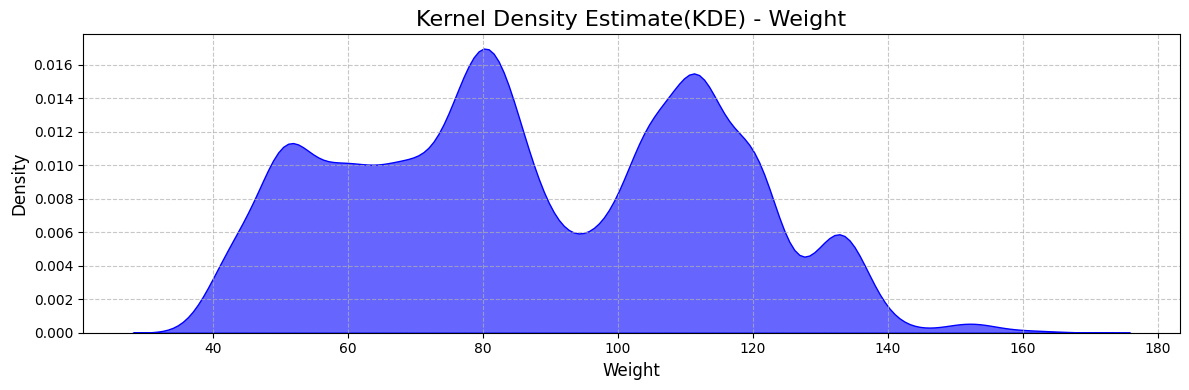

In [56]:
figure(figsize=(12,	4))
kdeplot(train_df['Weight'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Weight',	fontsize=16)
xlabel('Weight',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Distribución Bimodal**: Este gráfico muestra claramente dos picos distintos, lo que indica dos rangos de peso particularmente comunes en el conjunto de datos. Esto sugiere la presencia de dos grupos principales de individuos con diferentes pesos típicos.
- ##### **Grupo de Peso Primario**: El Peak más alto aparece alrededor de un peso de aproximadamente 80 kilogramos. Esto sugiere que una parte significativa del conjunto de datos consiste en individuos que pesan alrededor de este valor.
- ##### **Grupo de Peso Secundario**: El segundo Peak, ligeramente más bajo, se ubica alrededor de los 115 kilogramos. Esto indica otro grupo considerable de individuos con un peso promedio más alto en comparación con el primer grupo.
- ##### **Rango de Peso**: La distribución del peso abarca desde aproximadamente 30 kilogramos hasta 180 kilogramos, lo que muestra el rango general de pesos presente en los datos. - ##### **Menor densidad intermedia y en extremos**: La densidad es notablemente menor entre los dos Peaks principales (alrededor de 90-100 kg) y también en los extremos muy bajo y muy alto del espectro de peso. Esto implica menos individuos en estos rangos de peso dentro del conjunto de datos.
- ##### **Peaks menores**: También se observan pequeñas protuberancias o Peaks menores, por ejemplo, alrededor de 55 kg y 140 kg, que podrían representar subgrupos más pequeños dentro de los datos.

-------------------

#### **The Distribution of daily water consumption**

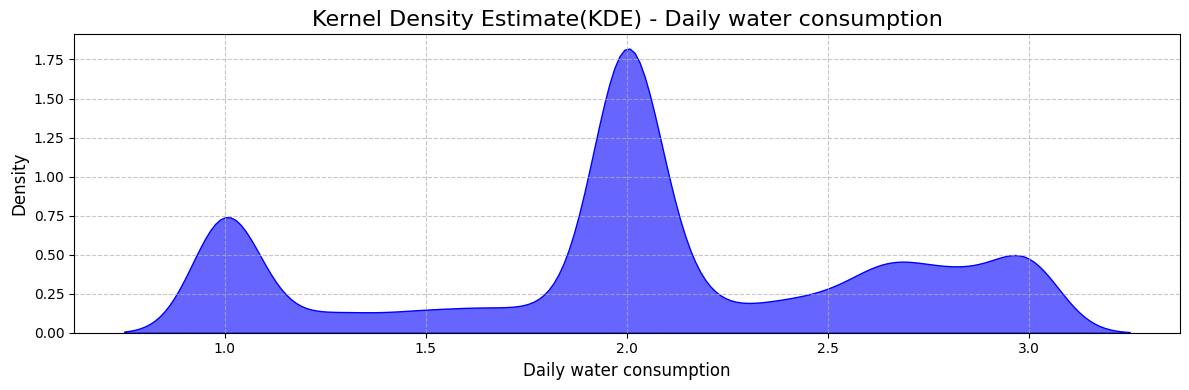

In [57]:
figure(figsize=(12,	4))
kdeplot(train_df['Daily water consumption'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Daily water consumption',	fontsize=16)
xlabel('Daily water consumption',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Distribución Trimodal**: Se observan claramente tres peaks distintos, lo que sugiere tres niveles comunes de consumo diario de agua en el conjunto de datos. Esto indica la presencia de al menos tres grupos de personas con diferentes hábitos típicos de consumo de agua.
- ##### **Nivel de Consumo Primario**: El peak más prominente se produce alrededor de los 2 litros de consumo diario de agua. Esto indica que una parte significativa de las personas del conjunto de datos tiende a consumir aproximadamente esta cantidad de agua al día.
- ##### **Niveles de Consumo Secundarios**: Hay otros dos peaks notables. Uno, más pequeño que el peak principal, se encuentra alrededor de 1 litro, lo que sugiere que otro grupo tiene una ingesta diaria de agua menor. El tercer peak, también considerable, aparece alrededor de los 3 litros, lo que indica un grupo con un mayor consumo diario de agua.
- ##### **Rango de Consumo**: La distribución abarca desde aproximadamente 0,5 litros hasta 3,5 litros de consumo diario de agua, lo que muestra el rango general observado en los datos. - ##### **Menor densidad entre estos peak**: La densidad es menor en las regiones entre estos peaks, lo que sugiere menos individuos con niveles de consumo diario de agua entre 1 y 2 litros, y entre 2 y 3 litros.

-----------------

#### **The Distribution of physical activity frequency**

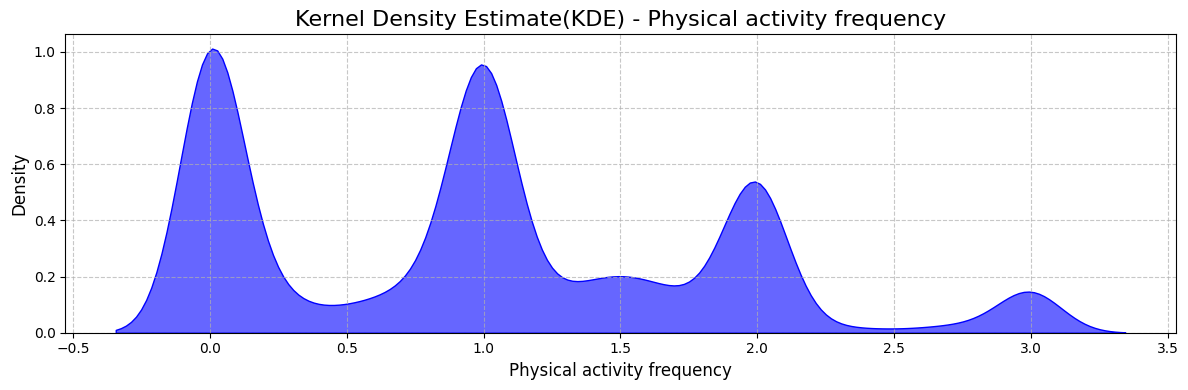

In [58]:
figure(figsize=(12,	4))
kdeplot(train_df['Physical activity frequency'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Physical activity frequency',	fontsize=16)
xlabel('Physical activity frequency',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Distribución multimodal**: Se observan cuatro peaks distintos que indican cuatro frecuencias comunes de actividad física en el conjunto de datos. Esto sugiere la presencia de varios grupos de personas con diferentes niveles de actividad física.
- ##### **Peaks principales**: Los dos picos más prominentes aparecen alrededor de una frecuencia de 0 (probablemente representando a las personas que no realizan actividad física) y alrededor de una frecuencia de 1 (quizás indicando a quienes realizan actividad una vez por un período definido, por ejemplo, a la semana). Estos parecen ser los niveles más comunes de actividad física en los datos.
- ##### **Picos secundarios**: Hay dos picos más pequeños pero notables. Uno tiene una frecuencia de 2, lo que sugiere que otro grupo realiza actividad física con esta frecuencia. El pico más pequeño tiene una frecuencia de 3, lo que indica un grupo más pequeño con una mayor frecuencia de actividad física.
- ##### **Rango de frecuencia**: La distribución abarca aproximadamente de -0,2 a 3,2 en la escala de frecuencia de actividad física. Dado que la frecuencia no puede ser negativa, la parte inferior a cero probablemente se deba al suavizado de los datos por el proceso de estimación de la densidad kernel. El rango práctico va de 0 a aproximadamente 3.
- ##### **Menor densidad intermedia**: La densidad es menor entre los picos principales, lo que sugiere que hay menos individuos con frecuencias de actividad física entre 0 y 1, y entre 1 y 2, etc.

------------------------

### **Correlation**

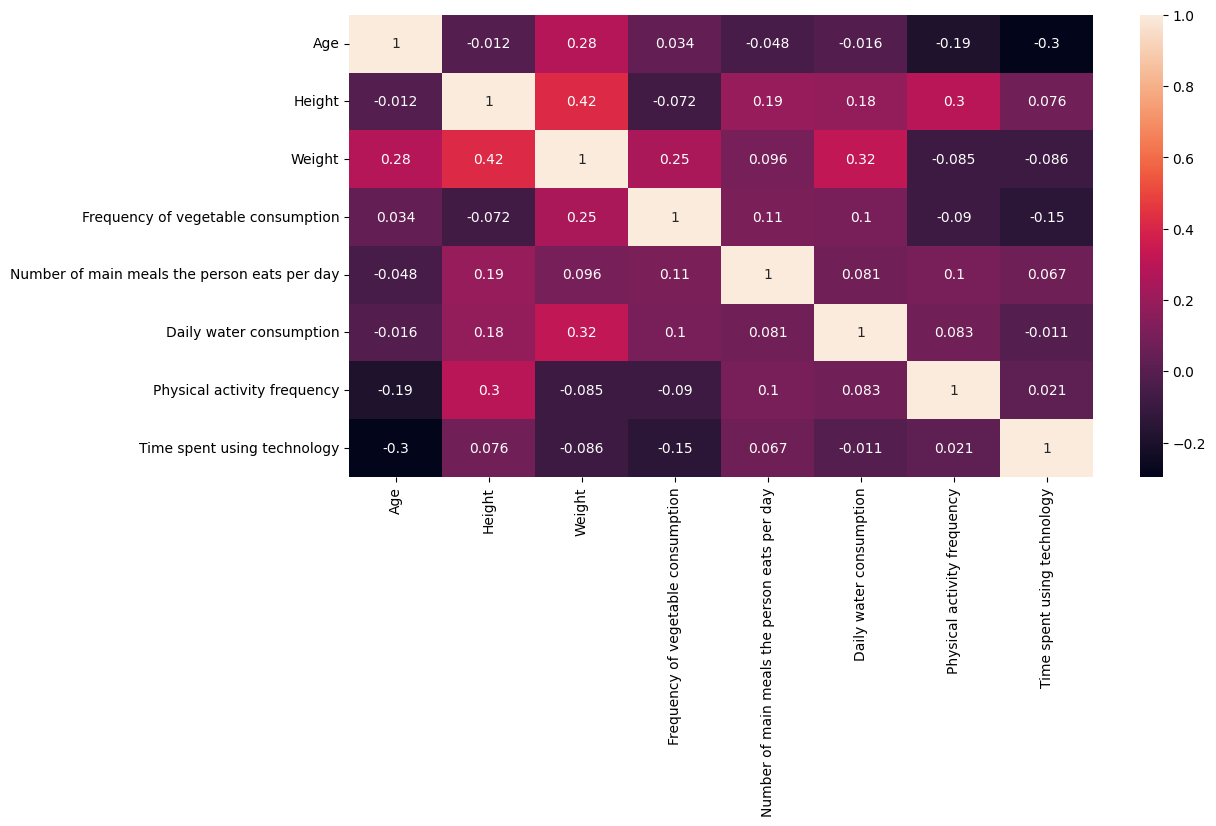

In [59]:
figure(figsize=(12,	6))
heatmap(train_df.select_dtypes(include='number').corr(), annot=True)
show()

- ##### **Peso y Estatura (0,42)**: Existe una correlación positiva moderada, lo que significa que, en general, las personas más altas tienden a pesar más.
- ##### **Peso y Edad (0,28)**: Existe una correlación positiva débil, lo que sugiere una ligera tendencia a que el peso aumente con la edad en el conjunto de datos.
- ##### **Peso y Consumo Diario de Agua (0,32)**: Existe una correlación positiva débil, lo que sugiere una ligera tendencia a que las personas que consumen más agua también pesen más en el conjunto de datos.
- ##### **Estatura y Frecuencia de Actividad Física (0,3)**: Existe una correlación positiva débil, lo que sugiere una ligera tendencia a que las personas más altas realicen actividad física con mayor frecuencia.
- ##### **Edad y Tiempo de Uso de Tecnología (-0,3)**: Existe una correlación negativa débil, lo que sugiere una ligera tendencia a que las personas mayores dediquen menos tiempo al uso de la tecnología. - ##### **Frecuencia de actividad física y tiempo dedicado al uso de tecnología (0,021)**: La correlación es muy débil y casi nula, lo que indica que casi no hay una relación lineal entre la frecuencia con la que alguien realiza actividad física y el tiempo que pasa usando tecnología en el conjunto de datos.

##### Existe una alta correlación negativa (-0,3) entre la **Edad** y el **Tiempo dedicado al uso de la tecnología**

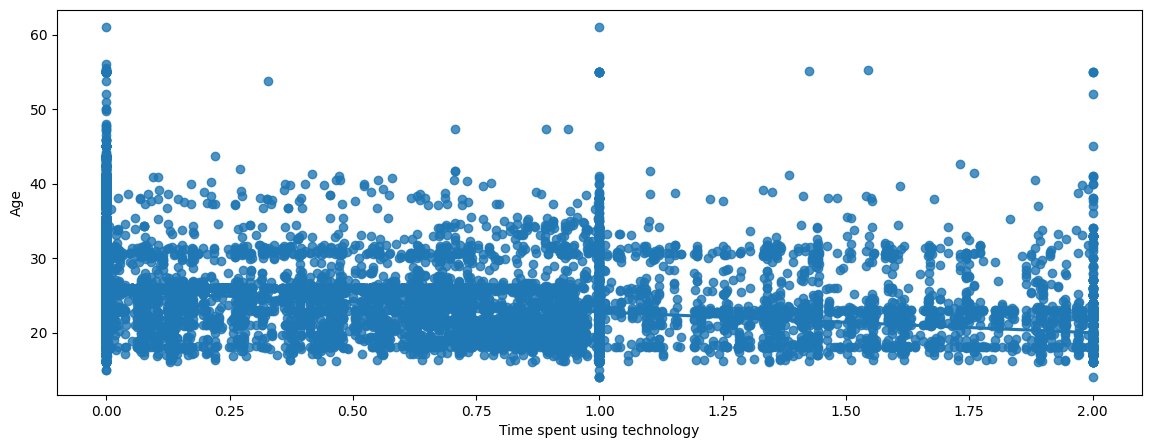

In [60]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="Time spent using technology", y="Age", data=train_df,ax=ax)
show()

------------------------------
-----------------------------

# **Extracción de características** (Feature Extraction)

-------------------------

In [61]:
train_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.973499       1
2.417635       1
2.690754       1
2.099687       1
1.873716       1
Name: count, Length: 934, dtype: int64

##### Transformar valores en la columna **Frecuencia de consumo de verduras** con la función **round()**

In [62]:
train_df['Frequency of vegetable consumption'] = train_df['Frequency of vegetable consumption'].apply(lambda x : round(x))

In [63]:
train_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
3    10092
2     9911
1      755
Name: count, dtype: int64

#### Extrayendo la nueva columna **[Frecuencia de consumo de vegetales Clases]** de **[Frecuencia de consumo de vegetales]**

In [64]:
def fcvc(m):
    m = int(m)
    if m == 1:
        return 'Rarely consumes vegetables'
    if m == 2:
        return 'Sometimes consumes vegetables'
    if m == 3:
        return 'Regularly consumes vegetables'

train_df['Frequency of vegetable consumption Classes'] = train_df['Frequency of vegetable consumption'].apply(lambda x : fcvc(x))

In [65]:
train_df['Frequency of vegetable consumption Classes'].value_counts()

Frequency of vegetable consumption Classes
Regularly consumes vegetables    10092
Sometimes consumes vegetables     9911
Rarely consumes vegetables         755
Name: count, dtype: int64

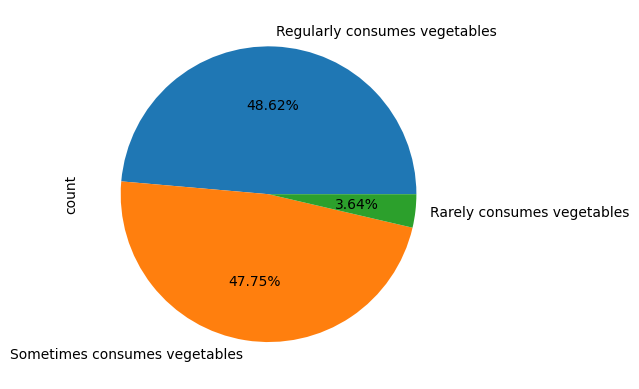

In [66]:
train_df['Frequency of vegetable consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **El porcentaje de quienes rara vez consumen verduras es muy bajo (3,64 %) en comparación con el resto de porcentajes**

-------------------------------

In [67]:
train_df['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
2.818026        1
1.164839        1
2.152733        1
2.814518        1
2.705445        1
Name: count, Length: 689, dtype: int64

##### Transforma los valores en la columna **Número de comidas principales que la persona realiza por día** con la función **round()**

In [68]:
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].apply(lambda x : round(x))

In [69]:
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].astype(int)

In [70]:
train_df['Number of main meals the person eats per day'].unique()

array([3, 1, 2, 4])

In [71]:
train_df['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    16309
1     2510
4     1040
2      899
Name: count, dtype: int64

#### Extrayendo la nueva columna **[Número de comidas principales que la persona come por día Clases]** de **[Número de comidas principales que la persona come por día]**

In [72]:
def fncp(m):
    m = int(m)
    if m == 1:
        return 'One meal per day'
    if m == 2:
        return 'Two meals per day'
    if m == 3:
        return 'Three meals per day'
    if m == 4:
        return 'More than three meals'

train_df['Number of main meals the person eats per day Classes'] = train_df['Number of main meals the person eats per day'].apply(lambda x : fncp(x))

In [73]:
train_df['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
Three meals per day      16309
One meal per day          2510
More than three meals     1040
Two meals per day          899
Name: count, dtype: int64

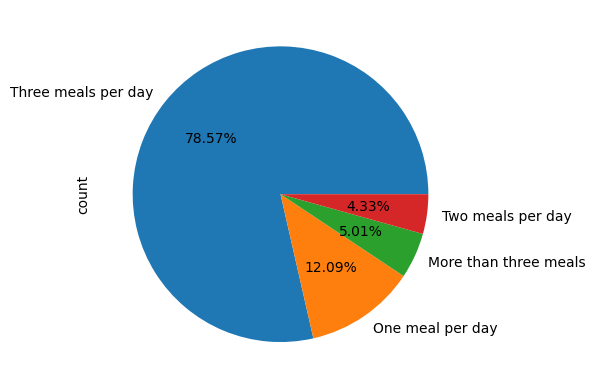

In [74]:
train_df['Number of main meals the person eats per day Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **El porcentaje de realizar tres comidas al día es muy alto (78,57 %) en comparación con el resto de porcentajes**

------------------------

#### Extrayendo la nueva columna **[Clases de consumo diario de agua]** de **[Consumo diario de agua]**

In [75]:
train_df['Daily water consumption'].value_counts()

Daily water consumption
2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.200588       1
2.938687       1
1.728332       1
2.983889       1
2.959777       1
Name: count, Length: 1506, dtype: int64

In [76]:
def fncp(m):
    m = int(m)
    if m <= 1:
        return 'Low water intake'
    elif m <= 2:
        return 'Moderate water intake'
    if m > 2:
        return 'High water intake'

train_df['Daily water consumption Classes'] = train_df['Daily water consumption'].apply(lambda x : fncp(x))

In [77]:
train_df['Daily water consumption Classes'].value_counts()

Daily water consumption Classes
Moderate water intake    13051
Low water intake          6136
High water intake         1571
Name: count, dtype: int64

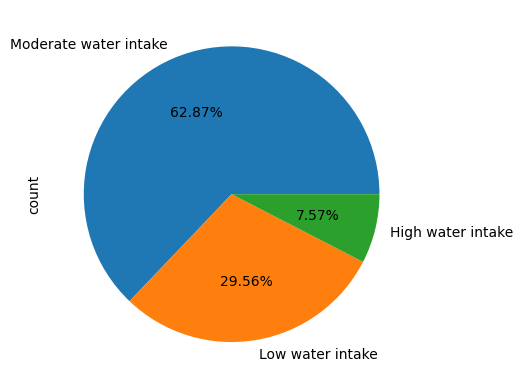

In [78]:
train_df['Daily water consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **El porcentaje de ingesta moderada de agua es muy elevado (62,87 %) en comparación con el resto de porcentajes**

------------------------

#### Extrayendo la nueva columna **[Clases de frecuencia de actividad física]** de **[Frecuencia de actividad física]**

In [79]:
train_df['Physical activity frequency'].value_counts()

Physical activity frequency
0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
2.523793       1
0.988668       1
0.271174       1
0.540397       1
0.978120       1
Name: count, Length: 1360, dtype: int64

In [80]:
def fncp(m):
    m = int(m)
    if m == 0 :
        return 'No physical activity'
    elif m <= 1 :
        return 'Very low activity'
    elif m < 2.6 :
        return 'Low to moderate activity'
    else :
        return 'Moderate activity'

train_df['Physical activity frequency Classes'] = train_df['Physical activity frequency'].apply(lambda x : fncp(x))

In [81]:
train_df['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity        9191
Very low activity           7886
Low to moderate activity    2881
Moderate activity            800
Name: count, dtype: int64

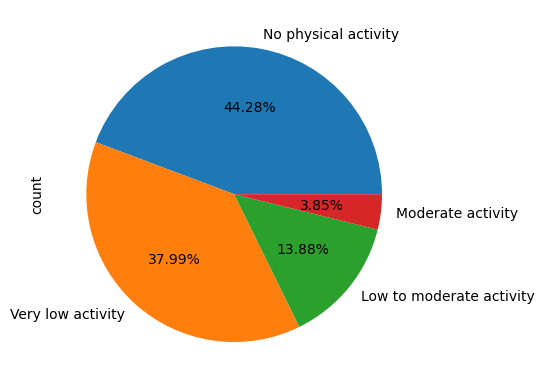

In [82]:
train_df['Physical activity frequency Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **El porcentaje de actividad moderada es muy bajo (3,85 %) en comparación con el resto de porcentajes**

----------------------

#### Extrayendo la nueva columna **[Tiempo dedicado al uso de clases de tecnología]** de **[Tiempo dedicado al uso de tecnología]**

In [83]:
train_df['Time spent using technology'].value_counts()

Time spent using technology
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
0.290979       1
0.733085       1
0.768071       1
1.967919       1
1.629194       1
Name: count, Length: 1297, dtype: int64

In [84]:
def fncp(m):
    m = int(m)
    if m <= 1 :
        return 'Very low screen time'
    else :
        return 'Moderate screen time'

train_df['Time spent using technology Classes'] = train_df['Time spent using technology'].apply(lambda x : fncp(x))

In [85]:
train_df['Time spent using technology Classes'].value_counts()

Time spent using technology Classes
Very low screen time    19625
Moderate screen time     1133
Name: count, dtype: int64

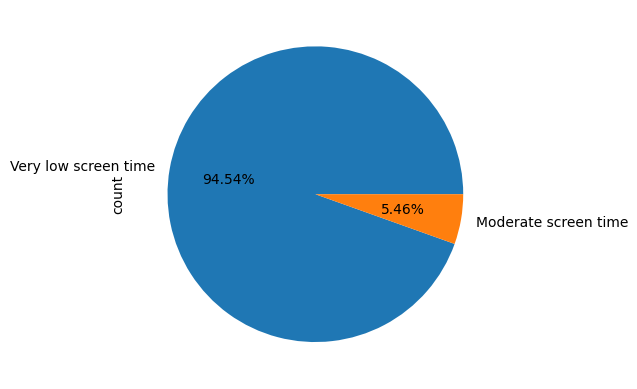

In [86]:
train_df['Time spent using technology Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **El porcentaje de tiempo de pantalla muy bajo es muy alto (94,54 %) en comparación con el resto de los porcentajes**

------------------------

##### Transformar valores en la columna **Edad** con la función **round()**

In [87]:
train_df['Age']

0        24.443011
1        18.000000
2        18.000000
3        20.952737
4        31.641081
           ...    
20753    25.137087
20754    18.000000
20755    20.101026
20756    33.852953
20757    26.680376
Name: Age, Length: 20758, dtype: float64

In [88]:
train_df['Age'] = train_df['Age'].apply(lambda x : int(round(x)))
train_df['Age']

0        24
1        18
2        18
3        21
4        32
         ..
20753    25
20754    18
20755    20
20756    34
20757    27
Name: Age, Length: 20758, dtype: int64

In [89]:
# train_df.to_csv('Obesity risk (New data).csv',index=False)

-----------------------
-----------------------

## **Detectar Outliers**

------------------------

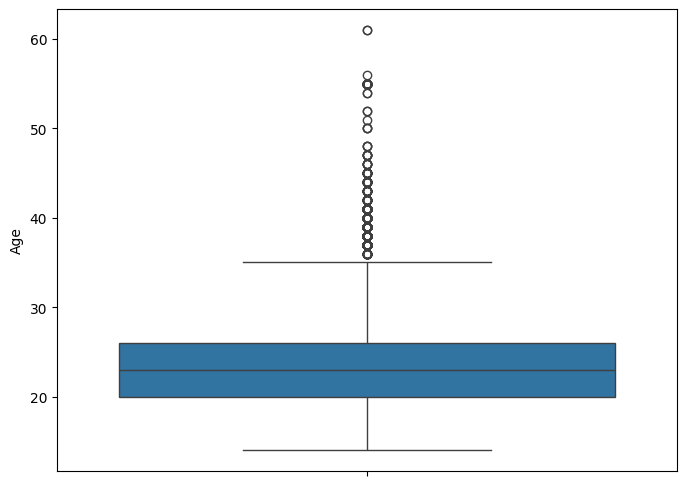

In [90]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 6)
boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
show()

- ##### La mayoría de las personas del conjunto de datos tienen entre 20 y 26 años aproximadamente.
- ##### La mediana de edad ronda los 23 años.
- ##### Hay algunas personas más jóvenes (hasta alrededor de 14 años) y varias significativamente mayores (valores atípicos) en el conjunto de datos.
- ##### La distribución de edades está ligeramente sesgada hacia el extremo inferior, ya que la mediana está más cerca del primer cuartil que del tercero.

In [91]:
Q1=train_df['Age'].quantile(0.25)
Q3=train_df['Age'].quantile(0.75)
IQR = Q3-Q1

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

outliers = ((train_df['Age']>Upper_bound)|(train_df['Age']<Lower_bound)).sum()
Total = train_df['Age'].shape[0]
print(f'Total of outliers in Age are : {outliers}--{round(100*(outliers)/Total,2)}%')

if outliers > 0:
    train_df=train_df.loc[(train_df['Age'] <= Upper_bound) & (train_df['Age'] >= Lower_bound)]

Total of outliers in Age are : 1029--4.96%


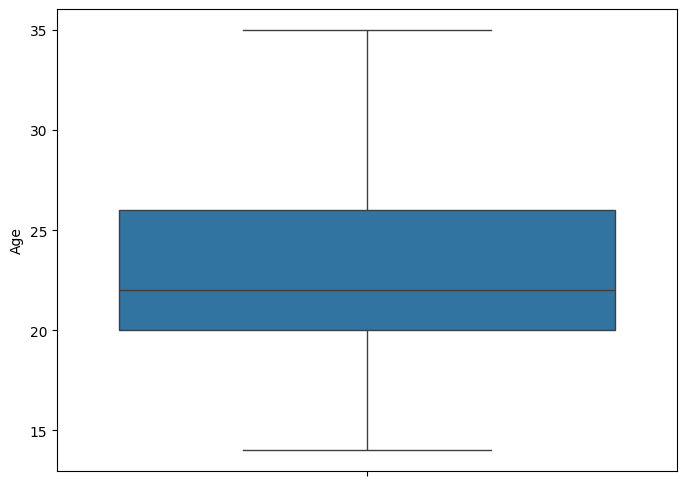

In [92]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 6)
boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
show()

- ##### Tras eliminar los valores atípicos, este diagrama de caja muestra que la distribución por edad está más concentrada:

- ##### El 50 % central de los individuos se encuentra entre 20 y 26 años.
- ##### La mediana de edad se mantiene en torno a los 23 años.
- ##### El rango general de edades ahora se sitúa aproximadamente entre los 14 y los 35 años.

In [93]:
# train_df.to_csv('train data (New data).csv',index=False)

# **Analisis**


## **Investigar las relaciones entre el género y las clases de frecuencia de actividad física**

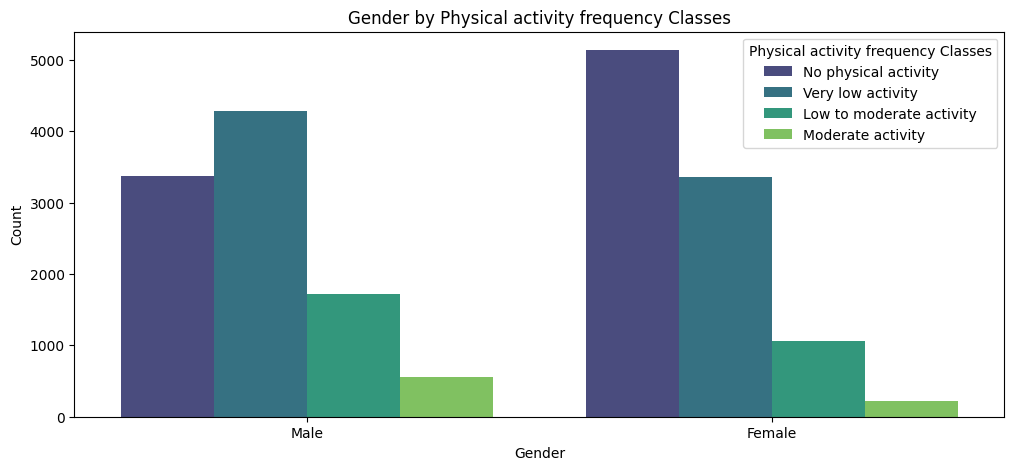

In [94]:
figure(figsize=(12,	5))
countplot(data=train_df, x='Gender', hue='Physical activity frequency Classes',	palette='viridis')
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
# plt.xticks(rotation=45)
ylabel('Count')
show()

- ##### La ausencia de actividad física es la categoría más frecuente en ambos sexos. Sin embargo, el número de mujeres que declaran no realizar actividad física es notablemente mayor que el de hombres en la misma categoría.
- ##### La actividad muy baja es la segunda categoría más frecuente en ambos sexos. Curiosamente, más hombres se encuentran en esta categoría que mujeres.
- ##### A medida que aumenta la frecuencia de la actividad física, el número de personas en cada categoría disminuye tanto para hombres como para mujeres.
- ##### Parece existir una disparidad de género en los niveles de actividad física. Una mayor proporción de mujeres en este conjunto de datos declara no realizar actividad física, mientras que una mayor proporción de hombres declara realizar actividad de muy baja a moderada.

### **Resumen**:

- ##### La falta de actividad física es una característica significativa tanto para hombres como para mujeres, pero más para estas últimas.
- ##### Los hombres tienden a participar ligeramente más en actividad física de muy baja a moderada en comparación con las mujeres.
- ##### La actividad física moderada es la menos común en ambos sexos.

##### Esta información podría ser crucial para comprender los hábitos de vida de la población de estudio y su posible relación con el riesgo de obesidad.

------------------------

##### **Investigar las relaciones entre el género y el nivel de obesidad**

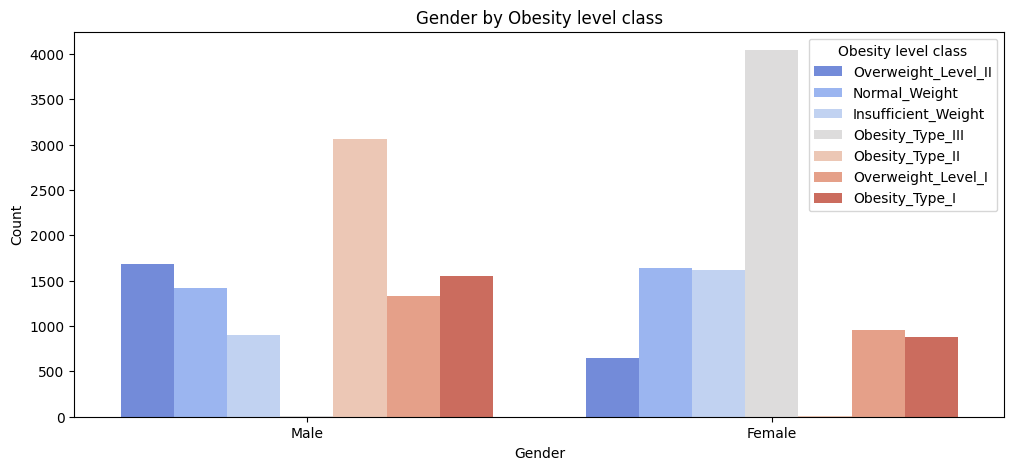

In [95]:
figure(figsize=(12, 5))
countplot(data=train_df, x='Gender', hue='Obesity level class', palette='coolwarm')
title('Gender by Obesity level class')
xlabel('Gender')
ylabel('Count')
show()

- ##### **Peso normal** y **Sobrepeso nivel II** son relativamente comunes en ambos sexos.
- ##### **Peso insuficiente** es más frecuente en mujeres que en hombres en este conjunto de datos.
- ##### **Obesidad tipo III** es significativamente más frecuente en mujeres que en hombres.
- ##### **Obesidad tipo II**, Sobrepeso nivel I y Obesidad tipo I son más frecuentes en hombres que en mujeres.

-------------------------

##### **Analizar la distribución del peso por género**

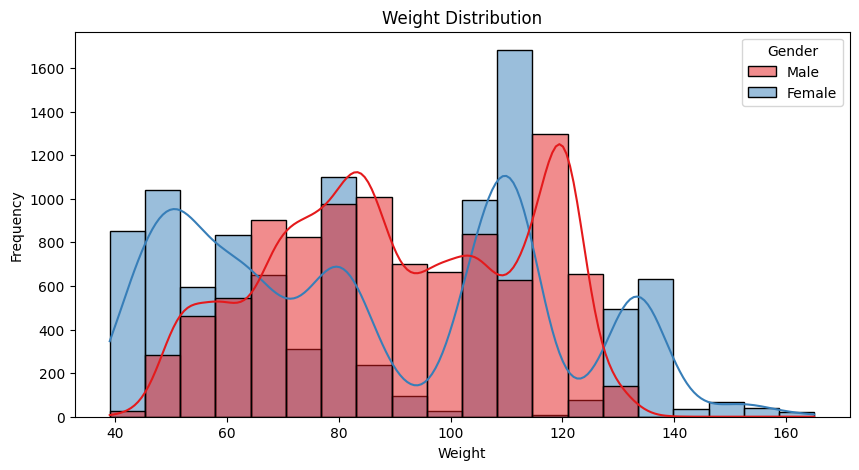

In [96]:
figure(figsize=(10, 5))
histplot(data=train_df,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set1')
title('Weight Distribution')
xlabel('Weight')
ylabel('Frequency')
show()

### **Comparación de Género**:

- ##### **Diferentes Tendencias Centrales**: Los hombres tienden a tener pesos más altos en general, con un peak principal alrededor de los 80-85 kg, mientras que el peack principal para las mujeres es más bajo, alrededor de los 55-60 kg.
- ##### **Mayor Frecuencia de Pesos Más Bajos en Mujeres**: Existe un pico claro en la distribución del peso femenino en el extremo inferior (40-45 kg) que no es tan prominente en la distribución masculina.
- ##### **Peaks Secundarios en Diferentes Pesos**: Los peaks secundarios para hombres (alrededor de 115-120 kg) y mujeres (alrededor de 100-105 kg) se encuentran en diferentes rangos de peso.
- ##### **Dispersión Similar**: Ambos sexos presentan un rango general de peso similar.

### **En resumen**, este gráfico revela que:

- ##### La distribución del peso difiere significativamente entre hombres y mujeres en el conjunto de datos.
- ##### Los hombres tienden a tener una distribución bimodal con peaks en los rangos de peso más altos.
- ##### Las mujeres muestran una distribución más compleja, potencialmente trimodal, con un peak principal en un rango de peso más bajo y otros peaks significativos en pesos más altos.

---------------------

##### **Analizar la distribución de la altura por género**

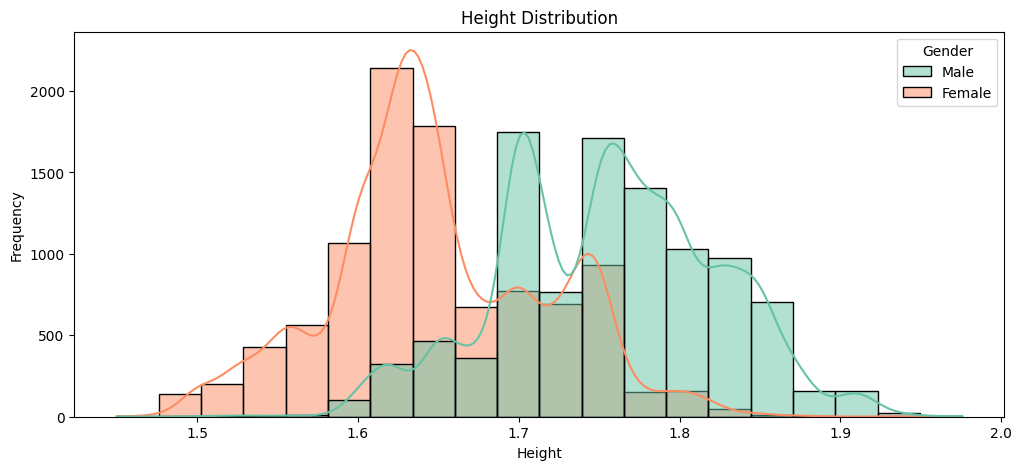

In [97]:
figure(figsize=(12, 5))
histplot(data=train_df,	x='Height',	hue='Gender', kde=True, bins=20, palette='Set2')
title('Height Distribution')
xlabel('Height')
ylabel('Frequency')
show()

### **Comparación de Género**:

- ##### **Diferentes Tendencias Centrales**: Los hombres son generalmente más altos que las mujeres en el conjunto de datos. Los peaks principales para los hombres se encuentran en valores de altura más altos que los peaks principales para las mujeres.
- ##### **Superposición de Rangos**: Si bien las tendencias centrales difieren, existe una superposición en los rangos de altura para hombres y mujeres, particularmente en el rango de 1,60 a 1,75 metros.
- ##### **Menos Dispersión en Mujeres**: La distribución de la altura para las mujeres parece tener una distribución ligeramente más estrecha en comparación con la de los hombres.

### **En resumen**, este gráfico revela que:

- ##### Existen claras diferencias en la distribución de la altura entre hombres y mujeres en el conjunto de datos.
- ##### Los machos tienden a concentrarse en dos rangos de altura: 1,70-1,75 metros y 1,75-1,80 metros, siendo este último más frecuente.
- ##### Las hembras también muestran una distribución bimodal, concentrándose en torno a 1,60-1,65 metros y 1,65-1,70 metros, siendo las primeras más frecuentes.

-----------------------

##### **Género** con **Edad > 30** y **Peso >= 90**

In [98]:
GenderGt30AndWeightGte90 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) , (['Age','Gender','Weight'])]

In [99]:
GenderGt30AndWeightGte90

Age  Gender      Weight
4       32    Male   93.798055
46      31    Male  120.998266
102     31    Male  122.813033
103     32    Male   90.000000
203     35  Female   90.000000
...    ...     ...         ...
20583   34    Male   91.059595
20598   31    Male  112.277567
20635   31    Male  120.919703
20710   34    Male  102.134646
20747   33    Male   99.000000

[961 rows x 3 columns]

In [100]:
GenderGt30AndWeightGte90['Age'].value_counts()

Age
31    550
32    160
33    154
34     68
35     29
Name: count, dtype: int64

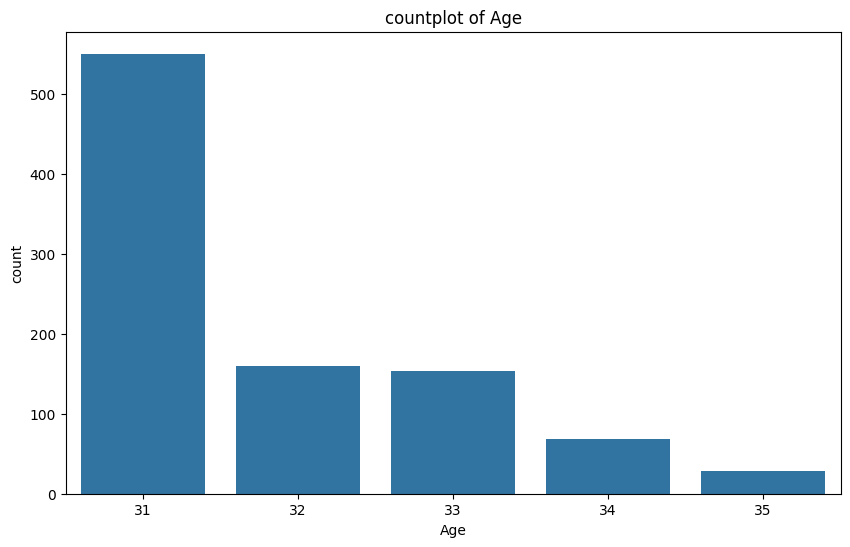

In [101]:
figure(figsize=(10, 6))
countplot(data = GenderGt30AndWeightGte90, x = 'Age', order = GenderGt30AndWeightGte90['Age'].value_counts().index)
title('countplot of Age')
show()

In [102]:
GenderGt30AndWeightGte90['Gender'].value_counts()

Gender
Male      955
Female      6
Name: count, dtype: int64

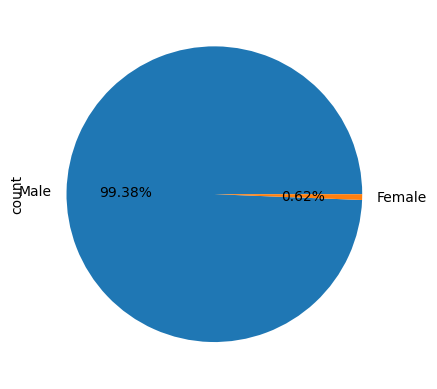

In [103]:
GenderGt30AndWeightGte90['Gender'].value_counts().plot.pie(autopct='%0.2f%%')
show()

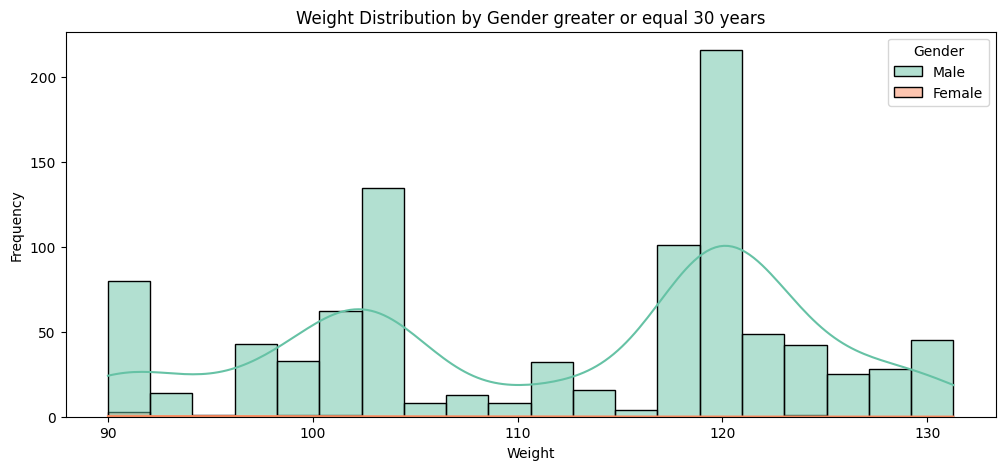

In [104]:
figure(figsize=(12, 5))
histplot(data=GenderGt30AndWeightGte90,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set2')
title('Weight Distribution by Gender greater or equal 30 years')
xlabel('Weight')
ylabel('Frequency')
show()

### **Comparación de género dentro de este rango de peso**:

- ##### **Mayor prevalencia de hombres**: Los hombres tienen una representación significativamente mayor en el rango de peso de 90 kg a 130 kg que las mujeres en el conjunto de datos.
- ##### **Diferentes formas de distribución**: Si bien los hombres muestran una distribución bimodal dentro de este rango, el número de mujeres es demasiado bajo para discernir un patrón de distribución claro.

### **Esta vista ampliada del rango de peso superior sugiere que**:

- ##### Los pesos entre 90 kg y 130 kg son considerablemente más comunes entre los hombres en el conjunto de datos.
- ##### Dentro de este segmento de mayor peso para los hombres, existen dos probables subgrupos con pesos promedio de alrededor de 103 kg y 121 kg.
- ##### Las mujeres son relativamente poco frecuentes en este rango de peso superior dentro del conjunto de datos.

----------------------

- ##### **Género** con **Edad <= 30** y **Peso >= 90**

In [105]:
GenderLte30AndWeightGte90 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) , (['Age','Gender','Weight'])]

In [106]:
GenderLte30AndWeightGte90['Age'].value_counts()

Age
26    2860
23     849
21     833
22     630
25     517
24     505
18     454
27     303
30     291
19     215
20     202
28     144
29     116
17      66
16       1
Name: count, dtype: int64

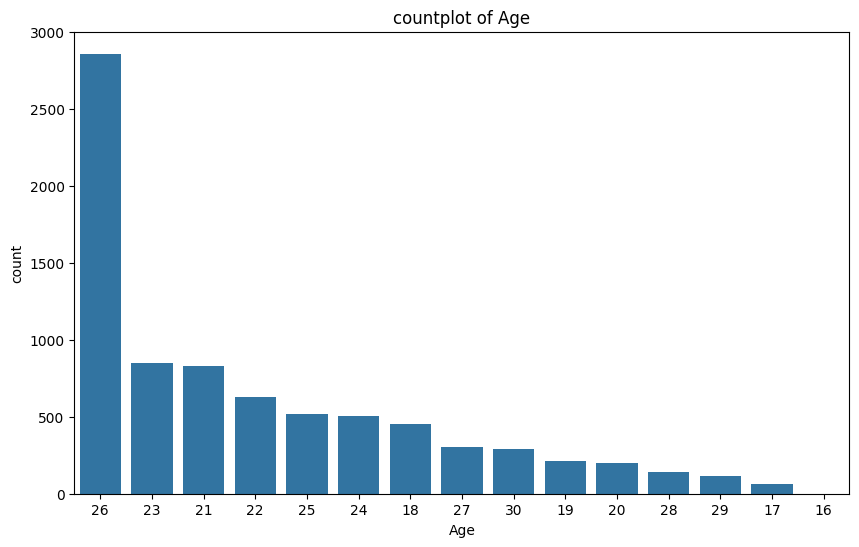

In [107]:
figure(figsize=(10, 6))
countplot(data = GenderLte30AndWeightGte90, x = 'Age', order = GenderLte30AndWeightGte90['Age'].value_counts().index)
title('countplot of Age')
show()

In [108]:
GenderLte30AndWeightGte90['Gender'].value_counts()

Gender
Female    4151
Male      3835
Name: count, dtype: int64

/tmp/ipython-input-109-1799672119.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90, palette=['green','red'])


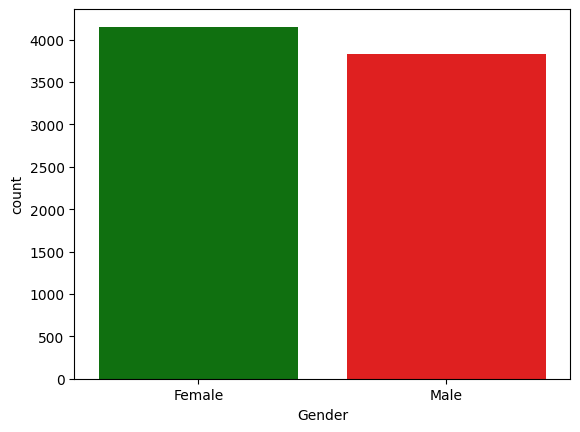

In [109]:
countplot(x='Gender', data=GenderLte30AndWeightGte90, palette=['green','red'])
xlabel('Gender')
show()

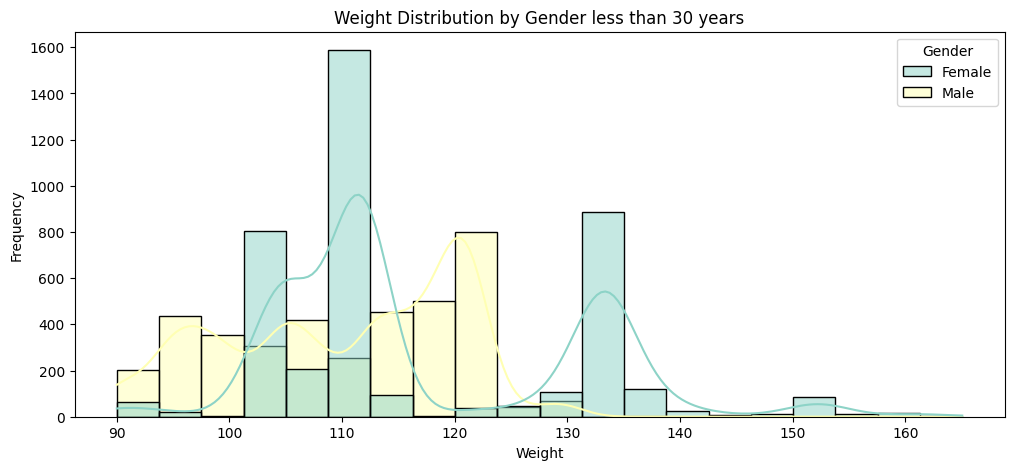

In [110]:
figure(figsize=(12, 5))
histplot(data=GenderLte30AndWeightGte90,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set3')
title('Weight Distribution by Gender less than 30 years')
xlabel('Weight')
ylabel('Frequency')
show()

### **Comparación de género dentro de este rango de peso**:

- ##### **Diferentes picos primarios**: Las hembras en este segmento de mayor peso tienden a agruparse más alrededor de 110-112 kg, mientras que los machos tienden a agruparse más alrededor de 120-122 kg.
- ##### **Diferencia de picos secundarios**: Los machos muestran un grupo secundario en un rango de peso inferior (95-98 kg) dentro de esta selección, mientras que el grupo secundario para las hembras se encuentra en un rango de peso superior (135-138 kg).
- ##### **Superposición**: Existe una superposición en las distribuciones de peso, especialmente entre 100 kg y 130 kg, donde ambos géneros tienen una representación significativa.
- ##### **Distribución de la cola**: La distribución disminuye en el extremo superior para ambos géneros, lo que indica un menor número de individuos con pesos muy altos.

### **Dentro del rango de peso superior de 90-165 kg**:

- ##### Tanto las hembras como los machos presentan una distribución de peso bimodal, lo que sugiere subgrupos dentro de cada género con diferentes puntos de peso.
- ##### Las hembras en este rango tienden a tener su grupo de peso primario ligeramente inferior al de los machos.
- ##### Los machos muestran un grupo secundario con un peso inferior dentro de esta selección, en comparación con el grupo secundario de las hembras.

------------------------

##### **Género** con **Edad > 30** y **Peso >= 90** y **Medio de transporte utilizado = Transporte público** o **Automóvil**

In [111]:
GenderGt30AndWeightGte90AndMeansTrans1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) &
             ((train_df['Means of transportation used'] == 'Public_Transportation') | (train_df['Means of transportation used'] == 'Automobile')) ,
             (['Age','Gender','Weight','Means of transportation used'])]

In [216]:
GenderGt30AndWeightGte90AndMeansTrans1

Age  Gender      Weight Means of transportation used
4       32    Male   93.798055        Public_Transportation
46      31    Male  120.998266        Public_Transportation
102     31    Male  122.813033        Public_Transportation
103     32    Male   90.000000                   Automobile
203     35  Female   90.000000                   Automobile
...    ...     ...         ...                          ...
20583   34    Male   91.059595                   Automobile
20598   31    Male  112.277567                   Automobile
20635   31    Male  120.919703                   Automobile
20710   34    Male  102.134646                   Automobile
20747   33    Male   99.000000                   Automobile

[955 rows x 4 columns]

In [113]:
GenderGt30AndWeightGte90AndMeansTrans1['Gender'].value_counts()

Gender
Male      949
Female      6
Name: count, dtype: int64

In [114]:
GenderGt30AndWeightGte90AndMeansTrans1['Means of transportation used'].value_counts()

Means of transportation used
Automobile               562
Public_Transportation    393
Name: count, dtype: int64

-------------------------

##### **Sexo** con **Edad > 30** y **Peso >= 90** y **Medio de transporte utilizado = Caminar** o **Bicicleta** o **Motocicleta**

In [115]:
GenderGt30AndWeightGte90AndMeansTrans2 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) &
             ((train_df['Means of transportation used'] == 'Walking') | (train_df['Means of transportation used'] == 'Bike') | (train_df['Means of transportation used'] == 'Motorbike')) ,
             (['Age','Gender','Weight','Means of transportation used'])]

In [116]:
GenderGt30AndWeightGte90AndMeansTrans2

Age Gender  Weight Means of transportation used
3533    33   Male    91.0                      Walking
4429    33   Male    97.0                      Walking
17672   33   Male    91.0                      Walking
17867   33   Male   113.0                      Walking
18248   33   Male    97.0                      Walking
18835   33   Male   103.0                      Walking

----------------------------

- ##### **Género** con **Edad <= 30** y **Peso >= 90** y **Medio de transporte utilizado = Transporte público** o **Automóvil**

In [117]:
GenderLte30AndWeightGtet90AndMeansTrans1 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) &
             ((train_df['Means of transportation used'] == 'Public_Transportation') | (train_df['Means of transportation used'] == 'Automobile')) ,
             (['Age','Gender','Weight','Means of transportation used'])]

In [118]:
GenderLte30AndWeightGtet90AndMeansTrans1

Age  Gender      Weight Means of transportation used
3       21  Female  131.274851        Public_Transportation
6       30    Male  112.725005                   Automobile
7       30    Male  118.206565                   Automobile
9       26  Female  111.275646        Public_Transportation
12      18    Male  108.251044        Public_Transportation
...    ...     ...         ...                          ...
20749   26  Female  104.835346        Public_Transportation
20751   21  Female  133.466763        Public_Transportation
20753   25    Male  114.187096        Public_Transportation
20755   20    Male  105.580491        Public_Transportation
20757   27    Male  118.134898        Public_Transportation

[7943 rows x 4 columns]

In [119]:
GenderLte30AndWeightGtet90AndMeansTrans1['Gender'].value_counts()

Gender
Female    4151
Male      3792
Name: count, dtype: int64

/tmp/ipython-input-120-2193786380.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])


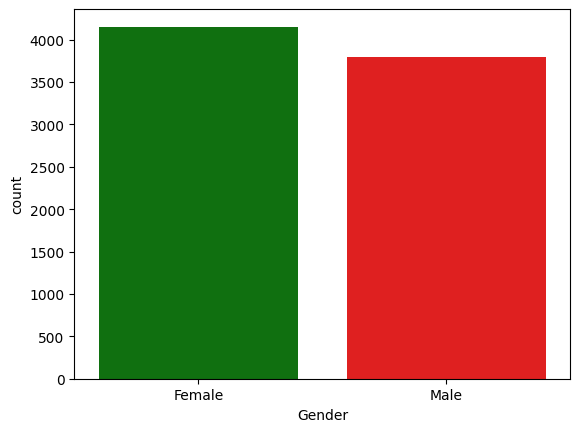

In [120]:
countplot(x='Gender', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])
xlabel('Gender')
show()

In [121]:
GenderLte30AndWeightGtet90AndMeansTrans1['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    7449
Automobile                494
Name: count, dtype: int64

/tmp/ipython-input-122-566136229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Means of transportation used', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])


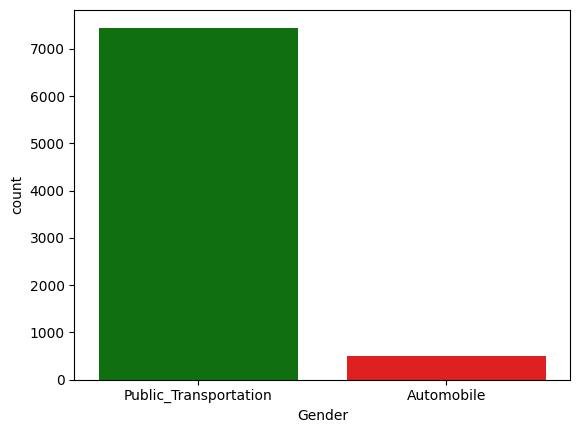

In [122]:
countplot(x='Means of transportation used', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])
xlabel('Gender')
show()

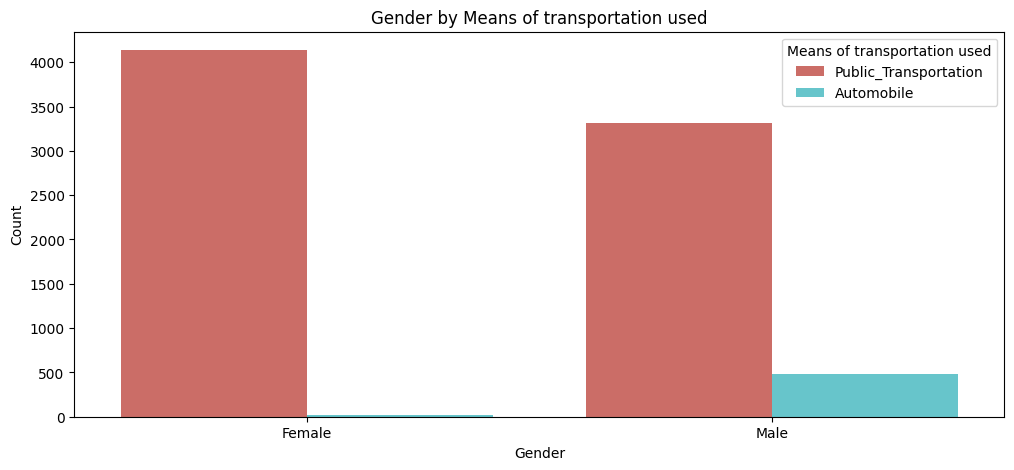

In [123]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGtet90AndMeansTrans1, x='Gender', hue='Means of transportation used', palette="hls")
title('Gender by Means of transportation used')
xlabel('Gender')
ylabel('Count')
show()

### **Para mujeres**:

- ##### **Transporte público**: La gran mayoría de las mujeres del conjunto de datos declara utilizar el transporte público. El número es significativamente alto, alrededor de 4150.
- ##### **Automóvil**: Un número muy pequeño de mujeres declara utilizar el automóvil como medio de transporte. El número es extremadamente bajo, cercano a cero.

### **Para hombres**:

- ##### **Transporte público**: Un número considerable de hombres también declara utilizar el transporte público, con un número aproximado de 3300. Esta cifra es inferior a la de mujeres.
- ##### **Automóvil**: Un número considerable de hombres declara utilizar el automóvil como medio de transporte, con un número aproximado de 500. Esta cifra es significativamente superior a la de mujeres.

### **Observaciones generales**:

- ##### El transporte público es el modo de transporte predominante para ambos sexos en el conjunto de datos. Sin embargo, es considerablemente más frecuente entre las mujeres.
- ##### El uso del automóvil es mucho más común entre los hombres que entre las mujeres.

### **En resumen, este gráfico sugiere que**:

- ##### Las mujeres de este conjunto de datos dependen mayoritariamente del transporte público.
- ##### Si bien el transporte público también es el medio de transporte principal para los hombres, una proporción considerable de ellos utiliza el automóvil.
- ##### Existe una clara diferencia de género en la preferencia o el acceso al automóvil como medio de transporte en esta población.

---------------------

##### **Género** con **Edad <= 30** y **Peso >= 90** y **Medio de transporte utilizado = Caminar** o **Bicicleta** o **Motocicleta**

In [124]:
GenderLte30AndWeightGte90AndMeansTrans2 = train_df.loc[(train_df['Age'] < 30) & (train_df['Weight'] >= 90) &
             ((train_df['Means of transportation used'] == 'Walking') | (train_df['Means of transportation used'] == 'Bike') | (train_df['Means of transportation used'] == 'Motorbike')) ,
             (['Age','Gender','Weight','Means of transportation used'])]

In [125]:
GenderLte30AndWeightGte90AndMeansTrans2

Age Gender      Weight Means of transportation used
639     17   Male   98.000000                      Walking
950     26   Male   90.000000                      Walking
1288    17   Male  113.000000                      Walking
1477    17   Male   97.000000                      Walking
1641    17   Male   97.000000                      Walking
2285    23   Male   95.000000                      Walking
3482    24   Male   90.000000                      Walking
3886    23   Male  105.000000                      Walking
5020    23   Male   97.000000                      Walking
5621    21   Male   96.000000                    Motorbike
5872    24   Male   97.000000                      Walking
5989    17   Male   95.000000                      Walking
6805    17   Male   99.000000                      Walking
7061    23   Male   96.000000                      Walking
7069    21   Male   93.000000                      Walking
7791    20   Male  105.000000                    Motorbike
8172    27   Male  118.533246                    Motorbike
8256    23   Male   95.000000                      Walking
8299    17   Male   95.000000                      Walking
8674    23   Male   90.000000                      Walking
9157    17   Male   92.000000                      Walking
9501    25   Male  113.000000                      Walking
10161   17   Male   97.000000                      Walking
10205   27   Male   99.000000                      Walking
10374   18   Male  112.000000                      Walking
10951   26   Male  121.094257                      Walking
12156   17   Male   95.000000                      Walking
13003   23   Male  114.000000                      Walking
13605   28   Male   97.959899                      Walking
13624   23   Male   96.000000                      Walking
13839   22   Male   95.000000                      Walking
13850   27   Male   90.000000                      Walking
14183   21   Male   90.000000                      Walking
14224   17   Male   97.000000                      Walking
14562   17   Male   95.000000                      Walking
14583   17   Male   93.000000                      Walking
16888   20   Male   98.000000                      Walking
16982   26   Male   90.000000                         Bike
17703   23   Male  107.000000                    Motorbike
19581   19   Male   94.000000                      Walking
19728   17   Male   97.000000                      Walking
19990   17   Male   97.000000                      Walking
20478   27   Male   99.000000                      Walking

In [126]:
GenderLte30AndWeightGte90AndMeansTrans2['Gender'].value_counts()

Gender
Male    43
Name: count, dtype: int64

In [127]:
GenderLte30AndWeightGte90AndMeansTrans2['Means of transportation used'].value_counts()

Means of transportation used
Walking      38
Motorbike     4
Bike          1
Name: count, dtype: int64

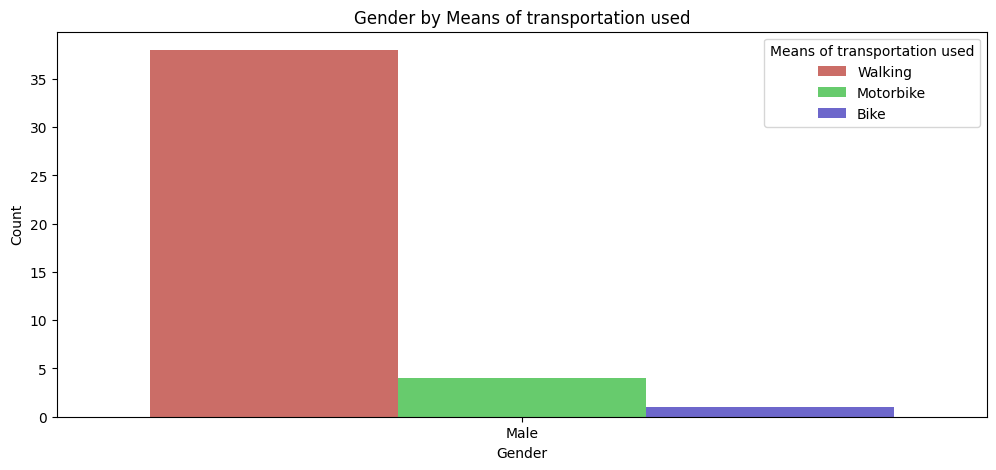

In [128]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndMeansTrans2, x='Gender', hue='Means of transportation used', palette="hls")
title('Gender by Means of transportation used')
xlabel('Gender')
ylabel('Count')
show()

### **Para hombres**:

- ##### **Caminar (Barra roja)**: Caminar es el medio de transporte más frecuente entre los hombres que se muestran en este gráfico, con aproximadamente 38.
- ##### **Motocicleta (Barra verde)**: El uso de la moto es considerablemente menos frecuente que caminar, con aproximadamente 4.
- ##### **Bicicleta (Barra azul)**: El uso de la bici es el menos frecuente de estas tres opciones para los hombres, con solo 1.

### **Observaciones generales para hombres (según este gráfico)**:

- ##### Caminar es el medio de transporte no motorizado/ligeramente motorizado predominante entre los hombres en este subconjunto de datos.
- ##### El uso de la moto está presente, pero es significativamente menor que caminar.
- ##### El uso de la bici es mínimo entre los hombres representados aquí.

### **Consideraciones importantes**:

- ##### Este gráfico solo muestra datos de hombres. No hay información sobre las mujeres ni su uso de estos medios de transporte en esta visualización en particular.
- ##### La escala del eje Y (Recuento) es relativamente pequeña (hasta 40). Esto sugiere que este gráfico podría centrarse en un subconjunto específico de los datos generales o que estos medios de transporte en particular no son muy comunes en la población general que se está estudiando, al menos entre los hombres.
- ##### Esto difiere del gráfico anterior, que se centraba en el transporte público y el automóvil.

### **En resumen, para los hombres representados en este gráfico específico:**

- ##### Caminar es el más común de los tres medios de transporte mostrados.
- ##### El uso de motocicletas está presente, pero es mucho menor.
- ##### El uso de bicicletas es muy poco frecuente.

--------------------

##### **Sexo** con **Edad > 30** y **Peso >= 90** y **Número de comidas principales que la persona realiza al día = 3** o **4**

In [129]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) &
             ((train_df['Number of main meals the person eats per day'] == 3) | (train_df['Number of main meals the person eats per day'] == 4)) ,
             (['Age','Gender','Weight','Number of main meals the person eats per day'])]

In [130]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1

Age  Gender      Weight  Number of main meals the person eats per day
46      31    Male  120.998266                                             3
102     31    Male  122.813033                                             3
203     35  Female   90.000000                                             3
206     32    Male  120.158049                                             3
208     32    Male  119.441207                                             3
...    ...     ...         ...                                           ...
20553   32    Male  128.114161                                             3
20583   34    Male   91.059595                                             3
20598   31    Male  112.277567                                             3
20635   31    Male  120.919703                                             3
20710   34    Male  102.134646                                             3

[760 rows x 4 columns]

In [131]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1['Gender'].value_counts()

Gender
Male      756
Female      4
Name: count, dtype: int64

/tmp/ipython-input-132-1549736959.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, palette=['green','red'])


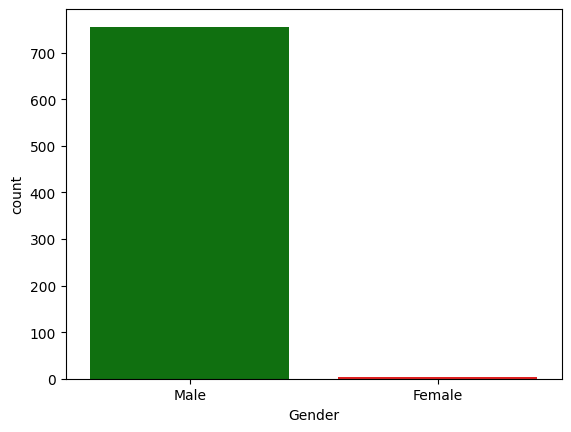

In [132]:
countplot(x='Gender', data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, palette=['green','red'])
xlabel('Gender')
show()

In [133]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    754
4      6
Name: count, dtype: int64

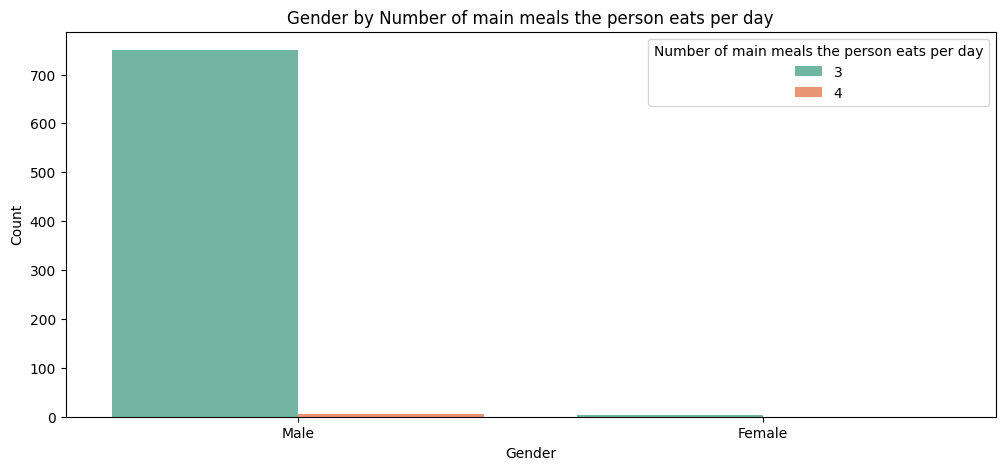

In [134]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, x='Gender', hue='Number of main meals the person eats per day', palette="Set2")
title('Gender by Number of main meals the person eats per day')
xlabel('Gender')
ylabel('Count')
show()

### **Para hombres**:

- ##### **3 comidas principales al día (Barra Verde Azulado)**: Un número muy elevado de hombres reportó consumir 3 comidas principales al día, con un recuento aproximado de 760.
- ##### **4 comidas principales al día (Barra de Salmón)**: Un número muy reducido de hombres reportó consumir 4 comidas principales al día, con un recuento inferior a 10.

### **Para mujeres**:

- ##### **3 comidas principales al día (Barra Verde Azulado)**: Un número muy reducido de mujeres reportó consumir 3 comidas principales al día, con un recuento inferior a 10.
- ##### **4 comidas principales al día (Barra de Salmón)**: El gráfico no muestra una barra para las mujeres que consumen 4 comidas principales, lo que implica que el recuento es cero o demasiado pequeño para ser visible.

### Observaciones generales:

- ##### Comer 3 comidas principales al día es mucho más común que comer 4 comidas principales al día en este subconjunto de datos.
- ##### Los hombres son mucho más propensos a reportar comer 3 comidas principales al día en comparación con las mujeres.
- ##### Comer 4 comidas principales al día parece ser muy poco común para ambos sexos en esta vista específica, pero ligeramente más frecuente entre los pocos hombres que lo reportaron.

### **Consideraciones importantes**:

- ##### Este gráfico solo muestra datos de personas que reportaron exactamente 3 o 4 comidas principales. No incluye a quienes podrían comer menos de 3 o más de 4 comidas principales.
- ##### Los conteos de mujeres en ambas categorías (y hombres que comen 4 comidas) son muy bajos. Esto podría indicar una tendencia real en sus datos o podría deberse a un tamaño de muestra más pequeño para estas categorías específicas.

### **En resumen, según esta gráfica**:

- ##### La gran mayoría de las personas que informan una frecuencia de comidas de 3 o 4 comidas principales al día son hombres que consumen 3 comidas.
- ##### Comer 4 comidas principales es poco común.
- ##### Las mujeres en esta perspectiva específica no se clasifican predominantemente (casi exclusivamente) en la categoría de "3 comidas principales" ni en la de "4 comidas principales", como se representa aquí, lo que sugiere que podrían haber informado un número diferente de comidas principales.

-----------------------

##### **Sexo** con **Edad <= 30** y **Peso >= 90** y **Número de comidas principales que la persona realiza al día = 3** o **4**

In [135]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) &
             ((train_df['Number of main meals the person eats per day'] == 3) | (train_df['Number of main meals the person eats per day'] == 4)) ,
             (['Age','Gender','Weight','Number of main meals the person eats per day'])]

In [136]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2

Age  Gender      Weight  Number of main meals the person eats per day
3       21  Female  131.274851                                             3
6       30    Male  112.725005                                             3
7       30    Male  118.206565                                             3
9       26  Female  111.275646                                             3
13      21  Female  131.529267                                             3
...    ...     ...         ...                                           ...
20749   26  Female  104.835346                                             3
20751   21  Female  133.466763                                             3
20753   25    Male  114.187096                                             3
20755   20    Male  105.580491                                             3
20757   27    Male  118.134898                                             3

[7376 rows x 4 columns]

In [137]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2['Gender'].value_counts()

Gender
Female    4134
Male      3242
Name: count, dtype: int64

/tmp/ipython-input-138-1141836588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, palette=['green','red'])


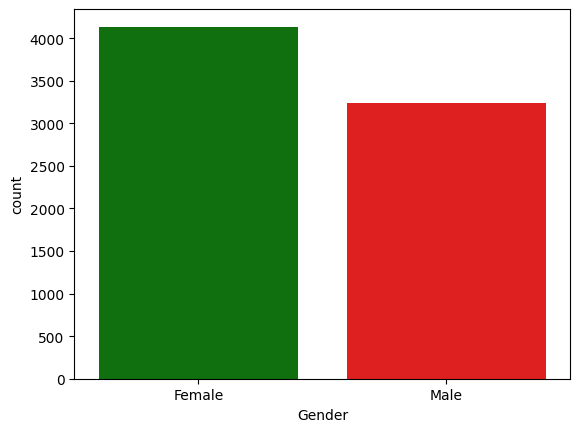

In [138]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, palette=['green','red'])
xlabel('Gender')
show()

In [139]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    7355
4      21
Name: count, dtype: int64

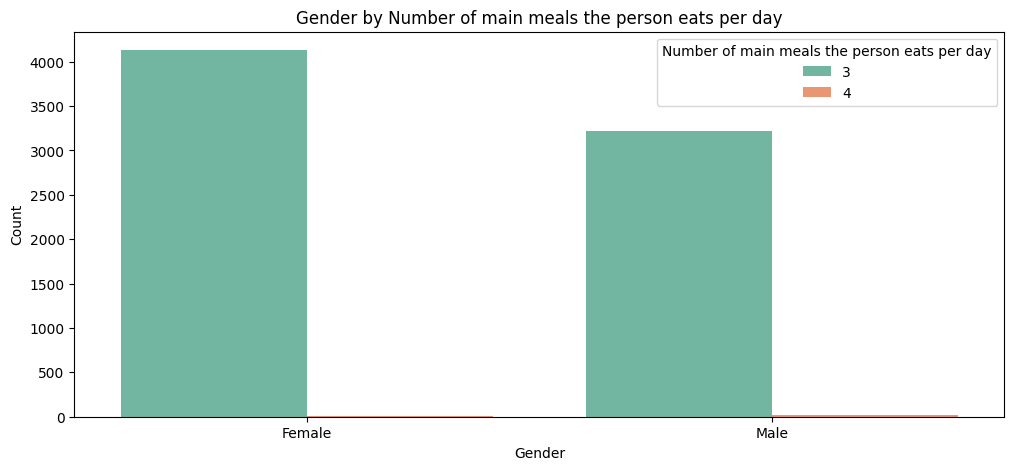

In [140]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, x='Gender', hue='Number of main meals the person eats per day', palette="Set2")
title('Gender by Number of main meals the person eats per day')
xlabel('Gender')
ylabel('Count')
show()

### **Para mujeres**:

- ##### **3 comidas principales al día (Barra Teal)**: Un número muy elevado de mujeres reportó consumir 3 comidas principales al día, con un recuento aproximado de 4150.
- ##### **4 comidas principales al día (Barra de salmón)**: Un número muy reducido de mujeres reportó consumir 4 comidas principales al día, con un recuento muy cercano a cero.

### **Para hombres**:

- ##### **3 comidas principales al día (Barra Teal)**: Un número considerable de hombres también reportó consumir 3 comidas principales al día, con un recuento aproximado de 3200. Esta cifra es inferior a la de mujeres que reportaron consumir 3 comidas.
- ##### **4 comidas principales al día (Barra de salmón)**: Un número muy reducido de hombres también reportó consumir 4 comidas principales al día, con un recuento muy cercano a cero.

### **Observaciones generales**:

- ##### Comer 3 comidas principales al día es el patrón predominante para ambos sexos en esta vista de datos.
- ##### Las mujeres son más propensas a comer 3 comidas principales al día que los hombres.
- ##### Comer 4 comidas principales al día es muy poco común para ambos sexos según este gráfico.

### **Comparación con el gráfico anterior:**

- ##### Los recuentos en este gráfico son significativamente mayores que en el anterior, lo que sugiere que esto podría representar una mayor proporción del conjunto de datos.
- ##### La tendencia se mantiene: comer 3 comidas principales es mucho más común que 4, y las mujeres muestran un mayor recuento de 3 comidas en comparación con los hombres.

### **En resumen, según este gráfico**:

- ##### La gran mayoría de los hombres y mujeres en este conjunto de datos informan comer 3 comidas principales al día. - ##### Una fracción muy pequeña de ambos sexos informa consumir 4 comidas principales al día.
- ##### Las mujeres tienen una mayor frecuencia de informar 3 comidas principales al día en comparación con los hombres.

--------------------------------------

##### **Sexo** con **Edad > 30** y **Peso >= 90** y **Clases de frecuencia de actividad física = Sin actividad física** o **Muy baja actividad**

In [141]:
GenderGt30AndWeightGte90AndPhysicalActivity1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) &
             ((train_df['Physical activity frequency Classes'] == 'No physical activity') | (train_df['Physical activity frequency Classes'] == 'Very low activity')) ,
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [142]:
GenderGt30AndWeightGte90AndPhysicalActivity1

Age  Gender      Weight Physical activity frequency Classes
4       32    Male   93.798055                   Very low activity
46      31    Male  120.998266                   Very low activity
102     31    Male  122.813033                No physical activity
103     32    Male   90.000000                   Very low activity
203     35  Female   90.000000                   Very low activity
...    ...     ...         ...                                 ...
20547   31    Male  118.424156                No physical activity
20553   32    Male  128.114161                No physical activity
20598   31    Male  112.277567                No physical activity
20635   31    Male  120.919703                No physical activity
20710   34    Male  102.134646                   Very low activity

[932 rows x 4 columns]

In [143]:
GenderGt30AndWeightGte90AndPhysicalActivity1['Gender'].value_counts()

Gender
Male      926
Female      6
Name: count, dtype: int64

/tmp/ipython-input-144-3618581145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderGt30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])


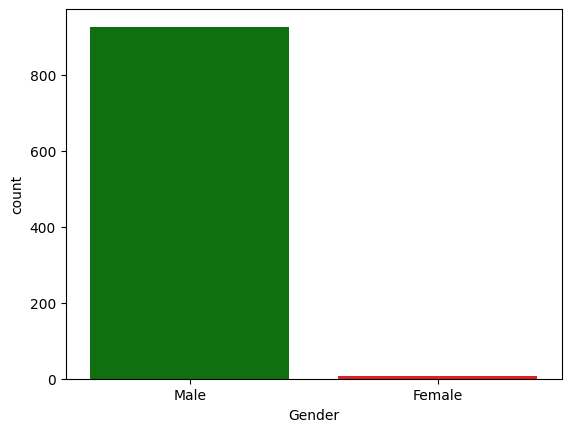

In [144]:
countplot(x='Gender', data=GenderGt30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])
xlabel('Gender')
show()

In [145]:
GenderGt30AndWeightGte90AndPhysicalActivity1['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity    494
Very low activity       438
Name: count, dtype: int64

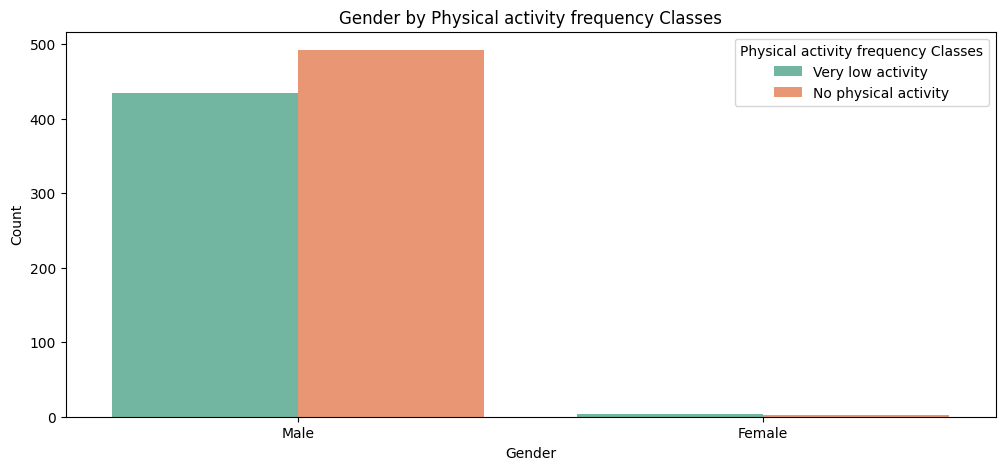

In [146]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndPhysicalActivity1, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **Para hombres**:

- ##### **Actividad muy baja (Barra verde azulado):** Un número significativo de hombres se clasifica como "Muy baja actividad", con un recuento de aproximadamente 435.
- ##### **Sin actividad física (Barra salmón):** Un número aún mayor de hombres se clasifica como "Sin actividad física", con un recuento de aproximadamente 490.

### **Para mujeres**:

- ##### **Actividad muy baja (Barra verde azulado):** Un número muy pequeño de mujeres se clasifica como "Muy baja actividad", con un recuento cercano a cero, pero ligeramente superior.
- ##### **Sin actividad física (Barra salmón):** Un número muy pequeño de mujeres también se clasifica como "Sin actividad física", con un recuento cercano a cero, pero ligeramente superior.

### **Observaciones generales (centradas en estos dos niveles de actividad)**:

- ##### **En los hombres**, la frecuencia de "Ninguna actividad física" es ligeramente mayor que la de "Muy baja actividad".
- ##### **En las mujeres**, tanto la frecuencia de "Muy baja actividad" como la de "Ninguna actividad física" son muy poco frecuentes en comparación con los hombres. Los valores son cercanos a cero en la escala de esta gráfica.
- ##### Existe una diferencia de género sustancial en la prevalencia de estos niveles más bajos de actividad física. Los hombres muestran valores considerablemente más altos en las categorías de "Muy baja actividad" y "Ninguna actividad física" en comparación con las mujeres.

- ##### Consideraciones importantes:

- ##### Esta gráfica solo se centra en dos categorías específicas de frecuencia de actividad física. No proporciona información sobre las personas con "Actividad baja a moderada" o "Actividad moderada". - ##### La escala del eje y (Recuento) llega hasta 500. Esto nos permite ver las diferencias relativas entre los recuentos de hombres y los recuentos de mujeres muy bajos.

### **En resumen, según este gráfico**:

- ##### Entre los hombres, "Ninguna actividad física" es ligeramente más común que "Muy baja actividad".
- ##### Tanto "Muy baja actividad" como "Ninguna actividad física" parecen ser poco comunes entre las mujeres en esta vista específica de los datos.
- ##### Los hombres en este conjunto de datos tienen una probabilidad mucho mayor de reportar "Muy baja actividad" o "Ninguna actividad física" en comparación con las mujeres.

--------------------------------------

##### **Género** con **Edad <= 30** y **Peso >= 90** y **Clases de frecuencia de actividad física = Sin actividad física** o **Actividad muy baja**

In [147]:
GenderLte30AndWeightGte90AndPhysicalActivity1 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) &
             ((train_df['Physical activity frequency Classes'] == 'No physical activity') | (train_df['Physical activity frequency Classes'] == 'Very low activity')) ,
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [148]:
GenderLte30AndWeightGte90AndPhysicalActivity1

Age  Gender      Weight Physical activity frequency Classes
3       21  Female  131.274851                   Very low activity
6       30    Male  112.725005                No physical activity
7       30    Male  118.206565                No physical activity
9       26  Female  111.275646                No physical activity
12      18    Male  108.251044                   Very low activity
...    ...     ...         ...                                 ...
20749   26  Female  104.835346                No physical activity
20751   21  Female  133.466763                   Very low activity
20753   25    Male  114.187096                   Very low activity
20755   20    Male  105.580491                   Very low activity
20757   27    Male  118.134898                No physical activity

[7555 rows x 4 columns]

In [149]:
GenderLte30AndWeightGte90AndPhysicalActivity1['Gender'].value_counts()

Gender
Female    4133
Male      3422
Name: count, dtype: int64

/tmp/ipython-input-150-3827297360.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])


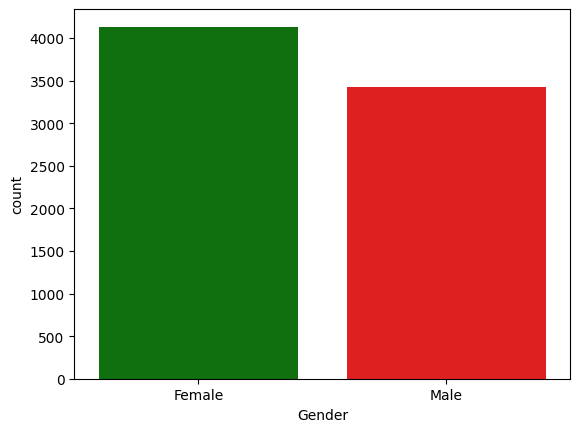

In [150]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])
xlabel('Gender')
show()

In [151]:
GenderLte30AndWeightGte90AndPhysicalActivity1['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity    4351
Very low activity       3204
Name: count, dtype: int64

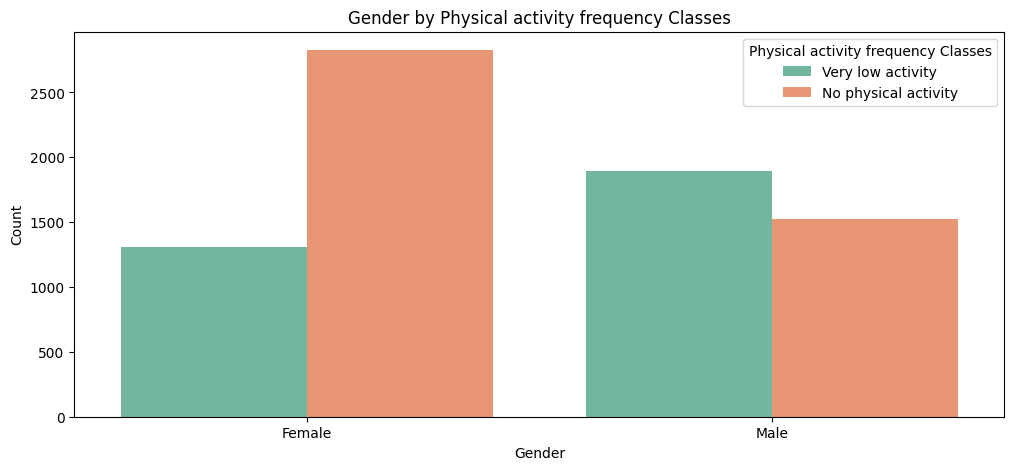

In [152]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndPhysicalActivity1, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **Para mujeres**:

- ##### **Actividad muy baja (Barra verde azulado)**: Aproximadamente 1300 mujeres se clasifican con "Muy baja actividad".
- ##### **Sin actividad física (Barra salmón)**: Un número mucho mayor de mujeres se clasifican con "Sin actividad física", con un total de aproximadamente 2850.

### **Para hombres**:

- ##### **Actividad muy baja (Barra verde azulado)**: Aproximadamente 1900 hombres se clasifican con "Muy baja actividad". Esta cifra es mayor que la de mujeres en la misma categoría.
- ##### **Sin actividad física (Barra salmón)**: Aproximadamente 1500 hombres se clasifican con "Sin actividad física". Esta cifra es menor que la de mujeres en la misma categoría.

### **Observaciones generales (centradas en estos dos niveles de actividad)**:

- ##### **En mujeres**, la prevalencia de "Ninguna actividad física" es significativamente mayor que la de "Muy baja actividad".
- ##### **En hombres**, la prevalencia de "Muy baja actividad" es mayor que la de "Ninguna actividad física".
- ##### Existe una clara diferencia de género en la distribución de estos niveles más bajos de actividad física. Una mayor proporción de mujeres en esta vista reportan "Ninguna actividad física", mientras que una mayor proporción de hombres reportan "Muy baja actividad".

### **Consideraciones importantes**:

- ##### Este gráfico solo se centra en dos categorías específicas de frecuencia de actividad física. No proporciona información sobre individuos con "Actividad baja a moderada" o "Actividad moderada".
- ##### La escala del eje Y (Recuento) llega hasta 3000. Esto nos permite ver los recuentos sustanciales en estas categorías.

### **En resumen, según este gráfico**:

- ##### **Entre las mujeres**, el nivel de actividad física más bajo predominante es "Ninguna actividad física".
- ##### **Entre los hombres**, el nivel de actividad física más bajo más común es "Muy poca actividad".
- ##### Las mujeres del conjunto de datos tienen mayor probabilidad de reportar "Ninguna actividad física" que los hombres, mientras que los hombres tienen mayor probabilidad de reportar "Muy poca actividad" que las mujeres, dentro de estas dos categorías.

--------------------------------------

##### **Sexo** con **Edad > 30** y **Peso >= 90** y **Clases de frecuencia de actividad física = Actividad baja a moderada** o **Actividad moderada**

In [153]:
GenderGt30AndWeightGte90AndPhysicalActivity2 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) &
             ((train_df['Physical activity frequency Classes'] == 'Low to moderate activity') | (train_df['Physical activity frequency Classes'] == 'Moderate activity')) ,
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [154]:
GenderGt30AndWeightGte90AndPhysicalActivity2

Age Gender      Weight Physical activity frequency Classes
460     33   Male   97.000000            Low to moderate activity
2612    34   Male   90.000000            Low to moderate activity
3547    33   Male   97.000000            Low to moderate activity
4438    34   Male  120.000000            Low to moderate activity
5920    32   Male  102.781971            Low to moderate activity
5923    34   Male   98.790167            Low to moderate activity
6454    33   Male   97.813023            Low to moderate activity
6460    33   Male   97.544696            Low to moderate activity
7186    33   Male   97.592949            Low to moderate activity
7474    33   Male   97.000000                   Moderate activity
8032    32   Male  105.800158            Low to moderate activity
8206    33   Male   97.000000            Low to moderate activity
8575    32   Male  101.544589            Low to moderate activity
9519    33   Male  107.559630            Low to moderate activity
11334   33   Male   97.000000            Low to moderate activity
14456   33   Male   93.310284            Low to moderate activity
15760   33   Male   90.000000            Low to moderate activity
16534   35   Male   98.543020            Low to moderate activity
16572   34   Male   90.000000            Low to moderate activity
16666   35   Male   90.471683            Low to moderate activity
16781   34   Male   99.000000            Low to moderate activity
17502   34   Male  100.000000            Low to moderate activity
17570   33   Male   97.000000                   Moderate activity
17672   33   Male   91.000000            Low to moderate activity
17804   34   Male  103.970612            Low to moderate activity
17867   33   Male  113.000000            Low to moderate activity
18566   35   Male  103.669116            Low to moderate activity
20583   34   Male   91.059595            Low to moderate activity
20747   33   Male   99.000000            Low to moderate activity

In [155]:
GenderGt30AndWeightGte90AndPhysicalActivity2['Gender'].value_counts()

Gender
Male    29
Name: count, dtype: int64

In [156]:
GenderGt30AndWeightGte90AndPhysicalActivity2['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
Low to moderate activity    27
Moderate activity            2
Name: count, dtype: int64

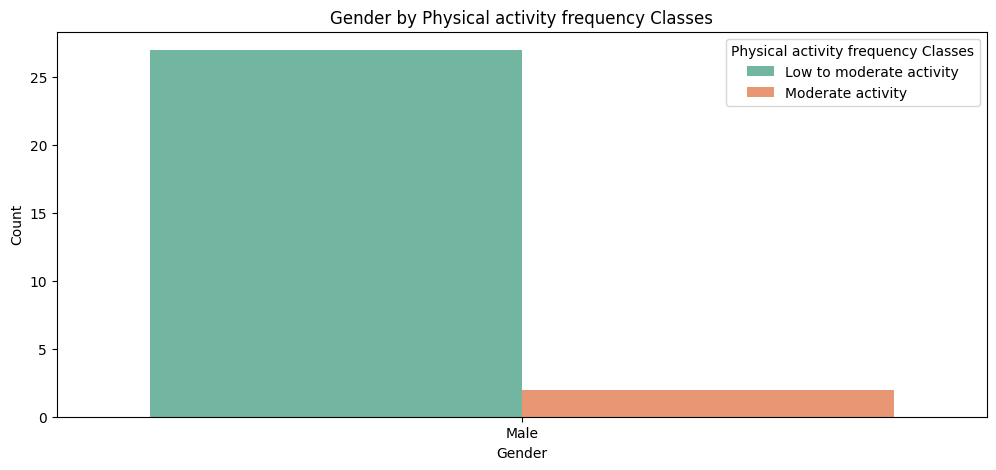

In [157]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndPhysicalActivity2, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **Para hombres**:

- ##### **Actividad baja a moderada (Barra verde azulado)**: Aproximadamente 27 hombres se clasifican con "Actividad baja a moderada".
- ##### **Actividad moderada (Barra salmón)**: Aproximadamente 2 hombres se clasifican con "Actividad moderada".

### Observaciones generales para hombres (según esta gráfica):

- ##### Dentro de estas dos categorías de actividad más altas, la "Actividad baja a moderada" es significativamente más frecuente entre los hombres que la "Actividad moderada".

### **Consideraciones importantes**:

- ##### Esta gráfica solo muestra datos de hombres. No hay información sobre las mujeres ni sus niveles de actividad en estas categorías en esta visualización en particular.
- ##### La escala del eje Y (Recuento) es relativamente pequeña (hasta 30). Esto sugiere que estos niveles más altos de actividad podrían ser menos comunes en el subgrupo masculino representado aquí, en comparación con los niveles más bajos de actividad que observamos en gráficos anteriores.
- ##### Este es otro fragmento de los datos generales de frecuencia de actividad física por género.

### **En resumen, para los hombres representados en este gráfico específico**:

- ##### Un número considerable de personas declaran actividad baja a moderada.
- ##### Un número mucho menor de personas declaran actividad moderada.

--------------------------------------

##### **Género** con **Edad <= 30** y **Peso >= 90** y **Clases de frecuencia de actividad física = Actividad baja a moderada** o **Actividad moderada**

In [158]:
GenderLte30AndWeightGte90AndPhysicalActivity2 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) &
             ((train_df['Physical activity frequency Classes'] == 'Low to moderate activity') | (train_df['Physical activity frequency Classes'] == 'Moderate activity')) ,
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [159]:
GenderLte30AndWeightGte90AndPhysicalActivity2

Age Gender      Weight Physical activity frequency Classes
31      23   Male   97.000000                   Moderate activity
79      22   Male  105.000000            Low to moderate activity
99      18   Male   95.000000            Low to moderate activity
110     22   Male   95.000000                   Moderate activity
143     20   Male  105.025808            Low to moderate activity
...    ...    ...         ...                                 ...
20550   26   Male  103.000000                   Moderate activity
20614   18   Male   90.000000            Low to moderate activity
20713   25   Male  114.000000            Low to moderate activity
20729   22   Male   98.447311            Low to moderate activity
20741   22   Male  105.037203            Low to moderate activity

[431 rows x 4 columns]

In [160]:
GenderLte30AndWeightGte90AndPhysicalActivity2['Gender'].value_counts()

Gender
Male      413
Female     18
Name: count, dtype: int64

/tmp/ipython-input-161-198168235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity2, palette=['green','red'])


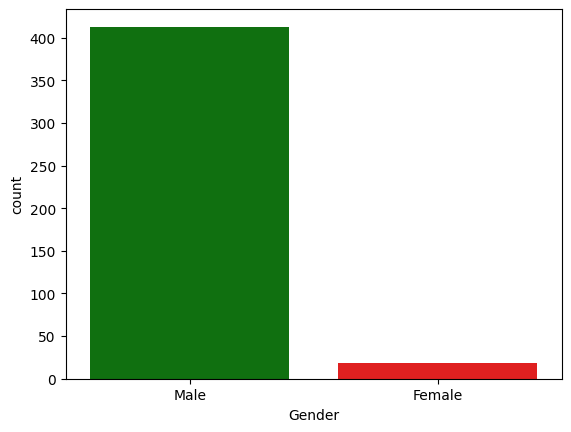

In [161]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity2, palette=['green','red'])
xlabel('Gender')
show()

In [162]:
GenderLte30AndWeightGte90AndPhysicalActivity2['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
Low to moderate activity    288
Moderate activity           143
Name: count, dtype: int64

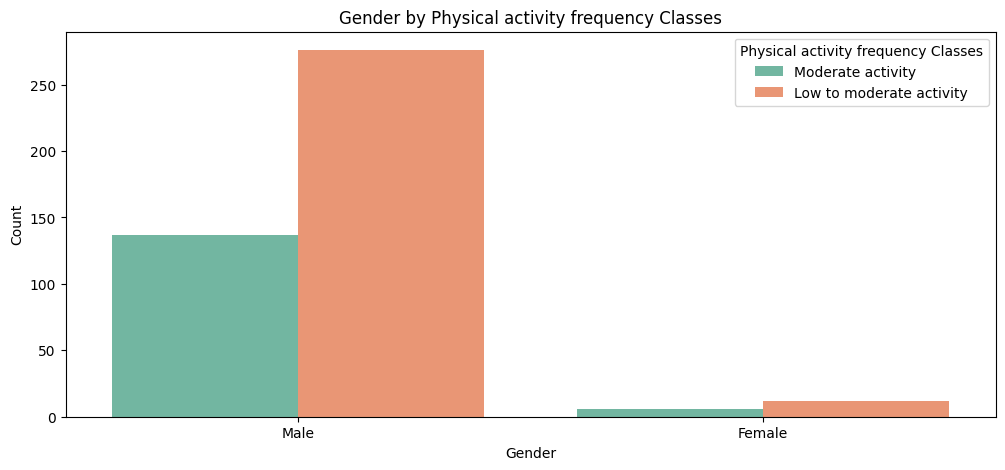

In [163]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndPhysicalActivity2, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **Para hombres**:

- ##### **Actividad moderada (Barra verde azulado)**: Aproximadamente 135 hombres se clasifican como de "Actividad moderada". - ##### **Actividad baja a moderada (Barra de Salmón)**: Un número mucho mayor de hombres se clasifican con "actividad baja a moderada", con un recuento de aproximadamente 280.

### **Para Mujeres**:

- ##### **Actividad moderada (Barra Verde Azulado)**: Un número muy pequeño de mujeres se clasifican con "actividad moderada", con un recuento de menos de 10.
- ##### **Actividad baja a moderada (Barra de Salmón)**: Un número pequeño de mujeres se clasifican con "actividad baja a moderada", con un recuento de aproximadamente 12.

### **Observaciones Generales (centradas en estos dos niveles de actividad)**:

- ##### **Para los hombres**, la "actividad baja a moderada" es considerablemente más frecuente que la "actividad moderada".
- ##### **Para las mujeres**, tanto la "actividad moderada" como la "actividad baja a moderada" tienen recuentos muy bajos en comparación con los hombres. - ##### Existe una diferencia de género sustancial en la prevalencia de estos niveles más altos de actividad física. Los hombres muestran cifras mucho más altas en las categorías de "Actividad moderada" y "Actividad baja a moderada" en comparación con las mujeres.

### **Consideraciones importantes:**

- ##### Este gráfico solo se centra en dos categorías específicas de frecuencia de actividad física. No proporciona información sobre las personas con "Ninguna actividad física" o "Actividad muy baja".
- ##### La escala del eje Y (Cantidad) llega hasta 300. Esto nos permite ver las diferencias relativas entre las cifras de hombres y mujeres en estas categorías.

### **En resumen, según este gráfico**:

- ##### Entre los hombres, la "Actividad baja a moderada" es la más común de los dos niveles de actividad más altos mostrados.
- ##### Tanto la "Actividad moderada" como la "Actividad baja a moderada" son relativamente poco frecuentes entre las mujeres en esta vista específica de los datos. - ##### Los hombres en el conjunto de datos tienen muchas más probabilidades de informar "Actividad moderada" o "Actividad baja a moderada" en comparación con las mujeres.

------------------------
-----------------------

## **Transformar datos**

-----------------------

##### **División de datos en número y objeto**

In [164]:
object_train_data = train_df.select_dtypes(include='object')
non_object_train_data = train_df.select_dtypes(exclude='object')

In [165]:
object_train_data

Gender Family history with overweight  \
0        Male                            yes   
1      Female                            yes   
2      Female                            yes   
3      Female                            yes   
4        Male                            yes   
...       ...                            ...   
20753    Male                            yes   
20754    Male                             no   
20755    Male                            yes   
20756    Male                            yes   
20757    Male                            yes   

      Frequent consumption of high-caloric food  \
0                                           yes   
1                                           yes   
2                                           yes   
3                                           yes   
4                                           yes   
...                                         ...   
20753                                       yes   
20754                                       yes   
20755                                       yes   
20756                                       yes   
20757                                       yes   

      Consumption of food between meals SMOKE  \
0                             Sometimes    no   
1                            Frequently    no   
2                             Sometimes    no   
3                             Sometimes    no   
4                             Sometimes    no   
...                                 ...   ...   
20753                         Sometimes    no   
20754                        Frequently    no   
20755                         Sometimes    no   
20756                         Sometimes    no   
20757                         Sometimes    no   

      Whether the person takes calorie supplements Alcohol consumption  \
0                                               no           Sometimes   
1                                               no                  no   
2                                               no                  no   
3                                               no           Sometimes   
4                                               no           Sometimes   
...                                            ...                 ...   
20753                                           no           Sometimes   
20754                                           no           Sometimes   
20755                                           no                  no   
20756                                           no                  no   
20757                                           no           Sometimes   

      Means of transportation used  Obesity level class  \
0            Public_Transportation  Overweight_Level_II   
1                       Automobile        Normal_Weight   
2            Public_Transportation  Insufficient_Weight   
3            Public_Transportation     Obesity_Type_III   
4            Public_Transportation  Overweight_Level_II   
...                            ...                  ...   
20753        Public_Transportation      Obesity_Type_II   
20754        Public_Transportation  Insufficient_Weight   
20755        Public_Transportation      Obesity_Type_II   
20756                   Automobile  Overweight_Level_II   
20757        Public_Transportation      Obesity_Type_II   

      Frequency of vegetable consumption Classes  \
0                  Sometimes consumes vegetables   
1                  Sometimes consumes vegetables   
2                  Sometimes consumes vegetables   
3                  Regularly consumes vegetables   
4                  Regularly consumes vegetables   
...                                          ...   
20753              Regularly consumes vegetables   
20754              Regularly consumes vegetables   
20755              Sometimes consumes vegetables   
20756              Regularly consumes vegetables   
20757              Regularly consumes vegetables   

     

##### **División de datos de objeto en datos de objeto con 2 únicos y datos de objeto Gt 2 únicos**

In [166]:
for col in object_train_data.columns:
    if object_train_data[col].nunique() == 2  :
        print(f'{col} : {object_train_data[col].nunique()}')

Gender : 2
Family history with overweight : 2
Frequent consumption of high-caloric food : 2
SMOKE : 2
Whether the person takes calorie supplements : 2
Time spent using technology Classes : 2


In [167]:
object_train_data_with_2_uniques = object_train_data[['Gender','Family history with overweight','Frequent consumption of high-caloric food','SMOKE',
                                                      'Whether the person takes calorie supplements','Time spent using technology Classes']]

In [168]:
label = LabelEncoder()
for col in range(0,object_train_data_with_2_uniques.shape[1]):
    object_train_data_with_2_uniques.iloc[:,col] = label.fit_transform(object_train_data_with_2_uniques.iloc[:,col])
object_train_data_with_2_uniques = object_train_data_with_2_uniques.astype(int)

In [169]:
object_train_data_with_2_uniques

Gender  Family history with overweight  \
0           1                               1   
1           0                               1   
2           0                               1   
3           0                               1   
4           1                               1   
...       ...                             ...   
20753       1                               1   
20754       1                               0   
20755       1                               1   
20756       1                               1   
20757       1                               1   

       Frequent consumption of high-caloric food  SMOKE  \
0                                              1      0   
1                                              1      0   
2                                              1      0   
3                                              1      0   
4                                              1      0   
...                                          ...    ...   
20753                                          1      0   
20754                                          1      0   
20755                                          1      0   
20756                                          1      0   
20757                                          1      0   

       Whether the person takes calorie supplements  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
20753                                             0   
20754                                             0   
20755                                             0   
20756                                             0   
20757                                             0   

       Time spent using technology Classes  
0                                        1  
1                                        1  
2                                        1  
3                                        1  
4                                        1  
...                                    ...  
20753                                    1  
20754                                    1  
20755                                    1  
20756                                    1  
20757                                    1  

[19729 rows x 6 columns]

In [170]:
object_train_data_with_2_uniques.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19729 entries, 0 to 20757
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Gender                                        19729 non-null  int64
 1   Family history with overweight                19729 non-null  int64
 2   Frequent consumption of high-caloric food     19729 non-null  int64
 3   SMOKE                                         19729 non-null  int64
 4   Whether the person takes calorie supplements  19729 non-null  int64
 5   Time spent using technology Classes           19729 non-null  int64
dtypes: int64(6)
memory usage: 1.1 MB


In [171]:
# # saving label
# with open('label.pkl' , 'wb') as f :
#     dump(label, f)

-------------------------

In [172]:
for col in object_train_data.columns:
    if object_train_data[col].nunique()  > 2 :
        print(f'{col} : {object_train_data[col].nunique()}')

Consumption of food between meals : 4
Alcohol consumption : 3
Means of transportation used : 5
Obesity level class : 7
Frequency of vegetable consumption Classes : 3
Number of main meals the person eats per day Classes : 4
Daily water consumption Classes : 3
Physical activity frequency Classes : 4


In [173]:
object_train_data_Gt_2_nuniques = object_train_data[['Consumption of food between meals','Alcohol consumption','Means of transportation used','Obesity level class','Frequency of vegetable consumption Classes','Number of main meals the person eats per day Classes','Daily water consumption Classes','Physical activity frequency Classes']]

In [174]:
object_train_data_Gt_2_nuniques

Consumption of food between meals Alcohol consumption  \
0                             Sometimes           Sometimes   
1                            Frequently                  no   
2                             Sometimes                  no   
3                             Sometimes           Sometimes   
4                             Sometimes           Sometimes   
...                                 ...                 ...   
20753                         Sometimes           Sometimes   
20754                        Frequently           Sometimes   
20755                         Sometimes                  no   
20756                         Sometimes                  no   
20757                         Sometimes           Sometimes   

      Means of transportation used  Obesity level class  \
0            Public_Transportation  Overweight_Level_II   
1                       Automobile        Normal_Weight   
2            Public_Transportation  Insufficient_Weight   
3            Public_Transportation     Obesity_Type_III   
4            Public_Transportation  Overweight_Level_II   
...                            ...                  ...   
20753        Public_Transportation      Obesity_Type_II   
20754        Public_Transportation  Insufficient_Weight   
20755        Public_Transportation      Obesity_Type_II   
20756                   Automobile  Overweight_Level_II   
20757        Public_Transportation      Obesity_Type_II   

      Frequency of vegetable consumption Classes  \
0                  Sometimes consumes vegetables   
1                  Sometimes consumes vegetables   
2                  Sometimes consumes vegetables   
3                  Regularly consumes vegetables   
4                  Regularly consumes vegetables   
...                                          ...   
20753              Regularly consumes vegetables   
20754              Regularly consumes vegetables   
20755              Sometimes consumes vegetables   
20756              Regularly consumes vegetables   
20757              Regularly consumes vegetables   

      Number of main meals the person eats per day Classes  \
0                                    Three meals per day     
1                                    Three meals per day     
2                                       One meal per day     
3                                    Three meals per day     
4                                      Two meals per day     
...                                                  ...     
20753                                Three meals per day     
20754                              More than three meals     
20755                                Three meals per day     
20756                                  Two meals per day     
20757                                Three meals per day     

      Daily water consumption Classes Physical activity frequency Classes  
0               Moderate water intake                No physical activity  
1               Moderate water intake                   Very low activity  
2                    Low water intake                No physical activity  
3                    Low water intake                   Very low activity  
4                    Low water intake                   Very low activity  
...                               ...                                 ...  
20753           Moderate water intake                   Very low activity  
20754                Low water intake            Low to moderate activity  
20755           Moderate water intake                   Very low activity  
20756           Moderate water intake                No physical activity  
20757           Moderate water intake                No physical activity  

[19729 rows x 8 columns]

--------------------------

In [175]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].value_counts()

Frequency of vegetable consumption Classes
Regularly consumes vegetables    9783
Sometimes consumes vegetables    9196
Rarely consumes vegetables        750
Name: count, dtype: int64

In [176]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Rarely consumes vegetables',0)
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Sometimes consumes vegetables',1)
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Regularly consumes vegetables',2)

/tmp/ipython-input-176-160115314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Rarely consumes vegetables',0)
/tmp/ipython-input-176-160115314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumptio

In [177]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].value_counts()


Frequency of vegetable consumption Classes
2    9783
1    9196
0     750
Name: count, dtype: int64

------------------------

In [178]:
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
Three meals per day      15521
One meal per day          2357
More than three meals     1030
Two meals per day          821
Name: count, dtype: int64

In [179]:

object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('One meal per day',0)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('Two meals per day',1)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('Three meals per day',2)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('More than three meals',3)

/tmp/ipython-input-179-1069382970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('One meal per day',0)
/tmp/ipython-input-179-1069382970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of m

In [180]:
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
2    15521
0     2357
3     1030
1      821
Name: count, dtype: int64

--------------------------------

In [181]:
object_train_data_Gt_2_nuniques['Daily water consumption Classes'].value_counts()

Daily water consumption Classes
Moderate water intake    12601
Low water intake          5599
High water intake         1529
Name: count, dtype: int64

In [182]:

object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Low water intake',0)
object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Moderate water intake',1)
object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('High water intake',2)

/tmp/ipython-input-182-4278355402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Low water intake',0)
/tmp/ipython-input-182-4278355402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Moderate water intake',1)
/tmp/

In [183]:
object_train_data_Gt_2_nuniques['Daily water consumption Classes'].value_counts()


Daily water consumption Classes
1    12601
0     5599
2     1529
Name: count, dtype: int64

----------------------------------------

In [184]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity        8514
Very low activity           7657
Low to moderate activity    2784
Moderate activity            774
Name: count, dtype: int64

In [185]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('No physical activity',0)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Very low activity',1)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Low to moderate activity',2)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Moderate activity',3)

/tmp/ipython-input-185-1857606638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('No physical activity',0)
/tmp/ipython-input-185-1857606638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Very low ac

In [186]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
0    8514
1    7657
2    2784
3     774
Name: count, dtype: int64

---------------------------

In [187]:
object_train_data_Gt_2_nuniques['Consumption of food between meals'].value_counts()

Consumption of food between meals
Sometimes     16566
Frequently     2425
Always          460
no              278
Name: count, dtype: int64

In [188]:
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('no',0)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Sometimes',1)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Frequently',2)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Always',3)

/tmp/ipython-input-188-3469034432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('no',0)
/tmp/ipython-input-188-3469034432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Sometimes',1)
/tmp/ipython-input-188-

In [189]:
object_train_data_Gt_2_nuniques['Consumption of food between meals'].value_counts()

Consumption of food between meals
1    16566
2     2425
3      460
0      278
Name: count, dtype: int64

-------------------------

In [190]:
object_train_data_Gt_2_nuniques['Alcohol consumption'].value_counts()


Alcohol consumption
Sometimes     14386
no             4872
Frequently      471
Name: count, dtype: int64

In [191]:
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('no',0)
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Sometimes',1)
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Frequently',2)

/tmp/ipython-input-191-1355582882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('no',0)
/tmp/ipython-input-191-1355582882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Sometimes',1)
/tmp/ipython-input-191-1355582882.py:3: FutureWarning: Downcasting behavior in 

In [192]:
object_train_data_Gt_2_nuniques['Alcohol consumption'].value_counts()

Alcohol consumption
1    14386
0     4872
2      471
Name: count, dtype: int64

------------------------------

In [193]:
object_train_data_Gt_2_nuniques['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    16669
Automobile                2537
Walking                    461
Motorbike                   32
Bike                        30
Name: count, dtype: int64

In [194]:
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Public_Transportation',0)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Automobile',1)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Walking',2)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Motorbike',3)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Bike',4)

/tmp/ipython-input-194-671721201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Public_Transportation',0)
/tmp/ipython-input-194-671721201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Automobile',1)
/tmp/ipython-input-194-67

In [195]:
object_train_data_Gt_2_nuniques['Means of transportation used'].value_counts()

Means of transportation used
0    16669
1     2537
2      461
3       32
4       30
Name: count, dtype: int64

----------------------

In [196]:
object_train_data_Gt_2_nuniques['Obesity level class'].value_counts()

Obesity level class
Obesity_Type_III       4046
Obesity_Type_II        3067
Normal_Weight          3062
Insufficient_Weight    2516
Obesity_Type_I         2425
Overweight_Level_II    2325
Overweight_Level_I     2288
Name: count, dtype: int64

In [197]:
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Insufficient_Weight',0)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Normal_Weight',1)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Overweight_Level_I',2)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Overweight_Level_II',3)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_I',4)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_II',5)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_III',6)

/tmp/ipython-input-197-3380256162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Insufficient_Weight',0)
/tmp/ipython-input-197-3380256162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Normal_Weight',1)
/tmp/ipython-input-197-3380256162.py:3: SettingWithCopyW

In [198]:
object_train_data_Gt_2_nuniques['Obesity level class'].value_counts()

Obesity level class
6    4046
5    3067
1    3062
0    2516
4    2425
3    2325
2    2288
Name: count, dtype: int64

---------------------

In [199]:
df=concat([non_object_train_data, object_train_data_with_2_uniques, object_train_data_Gt_2_nuniques],axis=1)

In [200]:
df

Age    Height      Weight  Frequency of vegetable consumption  \
0       24  1.699998   81.669950                                   2   
1       18  1.560000   57.000000                                   2   
2       18  1.711460   50.165754                                   2   
3       21  1.710730  131.274851                                   3   
4       32  1.914186   93.798055                                   3   
...    ...       ...         ...                                 ...   
20753   25  1.766626  114.187096                                   3   
20754   18  1.710000   50.000000                                   3   
20755   20  1.819557  105.580491                                   2   
20756   34  1.700000   83.520113                                   3   
20757   27  1.816547  118.134898                                   3   

       Number of main meals the person eats per day  Daily water consumption  \
0                                                 3                 2.763573   
1                                                 3                 2.000000   
2                                                 1                 1.910378   
3                                                 3                 1.674061   
4                                                 2                 1.979848   
...                                             ...                      ...   
20753                                             3                 2.151809   
20754                                             4                 1.000000   
20755                                             3                 2.000000   
20756                                             2                 2.144838   
20757                                             3                 2.003563   

       Physical activity frequency  Time spent using technology  Gender  \
0                         0.000000                     0.976473       1   
1                         1.000000                     1.000000       0   
2                         0.866045                     1.673584       0   
3                         1.467863                     0.780199       0   
4                         1.967973                     0.931721       1   
...                            ...                          ...     ...   
20753                     1.330519                     0.196680       1   
20754                     2.000000                     1.000000       1   
20755                     1.158040                     1.198439       1   
20756                     0.000000                     0.973834       1   
20757                     0.684487                     0.713823       1   

       Family history with overweight  ...  \
0                                   1  ...   
1                                   1  ...   
2                                   1  ...   
3                                   1  ...   
4                                   1  ...   
...                               ...  ...   
20753                               1  ...   
20754                               0  ...   
20755                               1  ...   
20756                               1  ...   
20757                               1  ...   

       Whether the person takes calorie supplements  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
20753                                             0   
20754                                             0   
20755                                             0   
20756                                             0   
20757                                             0   

       Time spent using technology Classes  Consumption of food be

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19729 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age                                                   19729 non-null  int64  
 1   Height                                                19729 non-null  float64
 2   Weight                                                19729 non-null  float64
 3   Frequency of vegetable consumption                    19729 non-null  int64  
 4   Number of main meals the person eats per day          19729 non-null  int64  
 5   Daily water consumption                               19729 non-null  float64
 6   Physical activity frequency                           19729 non-null  float64
 7   Time spent using technology                           19729 non-null  float64
 8   Gender                                                19729 n

--------------------------
--------------------------
-------------------------

# Modelo

---------------------

### **División de datos en datos de entrenamiento y datos de prueba**

------------------------------

In [202]:
x = df.drop(['Obesity level class'],axis=1)
y = df['Obesity level class']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1234)

In [203]:
print(f'x_train : {x_train.shape}   ,   x_test : {x_test.shape}')
print(f'y_train : {y_train.shape}   ,   y_test : {y_test.shape}')

x_train : (15783, 21)   ,   x_test : (3946, 21)
y_train : (15783,)   ,   y_test : (3946,)


----------------

### **Feature Scaling**

--------------------------

In [204]:
scaler = StandardScaler()

x_train[['Age','Weight']] = scaler.fit_transform(x_train[['Age','Weight']])
x_test[['Age','Weight']] = scaler.fit_transform(x_test[['Age','Weight']])

In [205]:
x_train

Age    Height    Weight  Frequency of vegetable consumption  \
12619  0.714914  1.635062  0.853249                                   3   
10036 -0.464257  1.580000 -1.160054                                   2   
20259 -0.700091  1.700000 -1.421374                                   2   
10652 -0.700091  1.660840 -1.457220                                   3   
11419  0.007411  1.755938  1.187397                                   2   
...         ...       ...       ...                                 ...   
8664   0.007411  1.859927  1.248845                                   3   
9959   1.894084  1.810215  1.381390                                   2   
8933   0.007411  1.707557 -0.466544                                   2   
17929 -0.935925  1.800000 -1.048060                                   2   
1381   0.714914  1.629442  0.622707                                   3   

       Number of main meals the person eats per day  Daily water consumption  \
12619                                             3                 1.184230   
10036                                             1                 2.000000   
20259                                             3                 1.000000   
10652                                             3                 2.000000   
11419                                             3                 2.174371   
...                                             ...                      ...   
8664                                              3                 1.797161   
9959                                              3                 1.662117   
8933                                              4                 2.078297   
17929                                             3                 2.000000   
1381                                              3                 2.654078   

       Physical activity frequency  Time spent using technology  Gender  \
12619                     0.000000                     0.436068       0   
10036                     0.000000                     1.000000       0   
20259                     0.000000                     2.000000       1   
10652                     0.000000                     1.000000       0   
11419                     1.251665                     0.840911       1   
...                            ...                          ...     ...   
8664                      0.899864                     1.898139       1   
9959                      0.992371                     0.500936       1   
8933                      0.774646                     1.944177       1   
17929                     2.000000                     1.000000       1   
1381                      0.144627                     0.926565       0   

       Family history with overweight  ...  SMOKE  \
12619                               1  ...      0   
10036                               1  ...      0   
20259                               0  ...      0   
10652                               0  ...      0   
11419                               1  ...      0   
...                               ...  ...    ...   
8664                                1  ...      0   
9959                                1  ...      1   
8933                                1  ...      0   
17929                               0  ...      0   
1381                                1  ...      0   

       Whether the person takes calorie supplements  \
12619                                             0   
10036                                             0   
20259                                             0   
10652                                             0   
11419                                             0   
...                                             ...   
8664                                              0   
9959                                              0   
8933                                              0   
17929                                             0   
1381   

In [206]:
# # saving scaling
# with open('scaler.pkl' , 'wb') as f :
#     dump(scaler, f)

----------------------

## **Creación de un modelo con algoritmos ML para multi-class**

--------------------------

In [207]:
models = [
    LogisticRegression(multi_class='multinomial', max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(decision_function_shape='ovr'),
]

In [208]:
def MultiClass(model):
    print(f"🔹 Model: {model}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [209]:
MultiClass(models[0])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


🔹 Model: LogisticRegression(max_iter=1000, multi_class='multinomial')
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       520
           1       0.81      0.85      0.83       608
           2       0.72      0.69      0.70       443
           3       0.71      0.67      0.69       488
           4       0.80      0.80      0.80       454
           5       0.93      0.96      0.95       625
           6       1.00      1.00      1.00       808

    accuracy                           0.86      3946
   macro avg       0.84      0.84      0.84      3946
weighted avg       0.86      0.86      0.86      3946



##### **El modelo logra una buena precisión general (86 %) al clasificar datos en siete clases. El rendimiento varía entre clases: las clases 6 y 5 muestran un rendimiento excelente, mientras que el rendimiento es relativamente bajo para las clases 2 y 3. Existe una variación en el número de muestras por clase.**

In [210]:
MultiClass(models[1])

🔹 Model: DecisionTreeClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       520
           1       0.75      0.78      0.77       608
           2       0.62      0.64      0.63       443
           3       0.72      0.69      0.70       488
           4       0.83      0.80      0.81       454
           5       0.94      0.96      0.95       625
           6       1.00      1.00      1.00       808

    accuracy                           0.84      3946
   macro avg       0.82      0.82      0.82      3946
weighted avg       0.84      0.84      0.84      3946



**El modelo actual de árbol de decisión alcanza una precisión menor (84%) en comparación con el modelo anterior (86%). Se observa una disminución en el rendimiento de la mayoría de las clases, con solo ligeras mejoras en algunas.**

In [211]:
MultiClass(models[2])

🔹 Model: RandomForestClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       520
           1       0.81      0.90      0.85       608
           2       0.79      0.74      0.76       443
           3       0.80      0.79      0.79       488
           4       0.88      0.88      0.88       454
           5       0.96      0.96      0.96       625
           6       1.00      1.00      1.00       808

    accuracy                           0.89      3946
   macro avg       0.88      0.88      0.88      3946
weighted avg       0.89      0.89      0.89      3946



##### **El modelo RandomForestClassifier() logra un rendimiento significativamente mejor con una precisión del 90%, mostrando mejoras notables en todas las métricas y en la mayoría de las clases en comparación con los dos modelos anteriores.**

In [212]:
MultiClass(models[3])

🔹 Model: KNeighborsClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       520
           1       0.63      0.67      0.65       608
           2       0.50      0.51      0.50       443
           3       0.64      0.53      0.58       488
           4       0.73      0.68      0.70       454
           5       0.93      0.95      0.94       625
           6       1.00      1.00      1.00       808

    accuracy                           0.77      3946
   macro avg       0.74      0.74      0.74      3946
weighted avg       0.77      0.77      0.76      3946



##### **El modelo KNeighborsClassifier() tiene un rendimiento significativamente peor con una precisión del 77 %, mostrando una gran disminución en todas las métricas y en la mayoría de las clases en comparación con los otros modelos, especialmente Random Forest.**

In [213]:
MultiClass(models[4])

🔹 Model: GaussianNB()
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       520
           1       0.61      0.48      0.54       608
           2       0.58      0.35      0.43       443
           3       0.56      0.35      0.43       488
           4       0.41      0.56      0.47       454
           5       0.71      0.95      0.81       625
           6       0.94      0.99      0.97       808

    accuracy                           0.68      3946
   macro avg       0.64      0.64      0.63      3946
weighted avg       0.67      0.68      0.66      3946



##### **El modelo GaussianNB() tiene un rendimiento significativamente peor, con una precisión del 68 %, la más baja de todos los modelos probados hasta la fecha. Se observa una disminución significativa en todas las métricas y en la mayoría de las clases, excepto por un rendimiento relativamente bueno en las clases 5 y 6.**

In [214]:
MultiClass(models[5])

🔹 Model: SVC()
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       520
           1       0.83      0.84      0.83       608
           2       0.72      0.70      0.71       443
           3       0.70      0.71      0.70       488
           4       0.83      0.81      0.82       454
           5       0.95      0.96      0.96       625
           6       1.00      1.00      1.00       808

    accuracy                           0.87      3946
   macro avg       0.85      0.85      0.85      3946
weighted avg       0.87      0.87      0.87      3946



##### **El modelo SVC() (Clasificador de Vectores de Soporte) alcanza un buen rendimiento con una precisión del 87 %. Esto es mejor que los modelos de Árbol de Decisión y KNN, pero no tan bueno como el modelo de Bosque Aleatorio (90 %). Presenta un rendimiento sólido en la mayoría de las clases, especialmente en 0, 5 y 6. Puede considerarse una buena opción.**

-------------------------

# <center><strong>Conclusion</strong></center>
--------------------------------------------


### **Con base en los resultados de los informes de clasificación analizados, se puede extraer la siguiente conclusión:**

- ##### **Rendimiento óptimo**: Hasta el momento, el modelo RandomForestClassifier() ha logrado el mejor rendimiento con una diferencia significativa en esta tarea de clasificación, alcanzando una precisión del 90 %. Además, demuestra un excelente rendimiento en todas las clases, con claras mejoras en comparación con los demás modelos.

- ##### **Rendimiento óptimo**: El modelo SVC() (Clasificador de Vectores de Soporte) ofrece un buen rendimiento con una precisión del 87 %, superior a la de los modelos Árbol de Decisión y KNeighborsClassifier, pero ligeramente inferior a la de Bosque Aleatorio. Puede considerarse una buena alternativa.

- ##### **Rendimiento moderado a bueno**: El modelo DecisionTreeClassifier() alcanzó una precisión del 84 %, inferior a la de los dos modelos principales, pero con un rendimiento aceptable.

- ##### **Rendimiento deficiente**: El modelo KNeighborsClassifier() mostró un rendimiento significativamente inferior, con una precisión del 77 %, lo que sugiere que podría no ser la opción óptima para esta tarea con la configuración actual.

- ##### **Rendimiento más bajo**: El modelo GaussianNB() obtuvo el rendimiento más bajo, con una precisión del 68 %, lo que lo hace menos adecuado para este problema en comparación con los otros modelos.

----------------------------